# Hands-On NLP
## Class 1

- Getting some data

- Understanding a text corpus

  - Unicode

  - Character distributions

- The notion of words

  - Word distributions

  - Types and tokens

  - Text complexity

In [1]:
import re
import unicodedata
from collections import Counter
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm

In [2]:
tqdm.pandas()

nltk.download("punkt")

sns.set_style("darkgrid")
sns.set_context("notebook")

pd.set_option('display.precision', 2)

[nltk_data] Downloading package punkt to /Users/evrard/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
%config InlineBackend.figure_format="retina"  # For high DPI display

# %load_ext blackcellmagic

In [4]:
DATA = Path("data")

TEXT_P = DATA / "texts"

CORPORA = [
    "mythology",
    "woodworking",
    "robotics",
    "hsm",
    "health",
    "portuguese",
]

EPS = np.finfo(float).eps

In [5]:
TEXT_P.mkdir(exist_ok=True)

# Getting some data

- If you have already downloaded the preprocessed "texts" folder, skip this, if not uncomment

- If you don't know how to use *git*, *conda* or *pip* inside of the notebook, learn it *now*

In [6]:
# !git clone https://github.com/EleutherAI/stackexchange_dataset/
# # %cd stackexchange_dataset
# # %pwd
# # !pip install -r requirements.txt

# !conda create -n honlp python=3.9
# !conda activate honlp
# !conda config --env --add channels conda-forge\n\n
# !conda update --all
# !conda install ipykernel pandas seaborn nltk ipywidgets
# !conda install bs4 lxml py7zr tqdm jsonlines zstandard ujson requests wget
# !pip install lm-dataformat
# !pip check

In [7]:
# !python stackexchange_dataset/main.py --names \
#     mythology.stackexchange,woodworking.stackexchange,woodworking.stackexchange,
#     robotics.stackexchange,hsm.stackexchange,health.stackexchange,
#     portuguese.stackexchange

In [8]:
# for corpus in CORPORA:
#     print(corpus)
#     shutil.unpack_archive(
#         (OUT_PATH / corpus).with_suffix(".stackexchange.zip"),
#         OUT_PATH / corpus,
#     )

# print("*** Done ***")

In [9]:
corpora = {}
stats = []

for corpus in tqdm(CORPORA):
    print(corpus)
    texts = []
    for fp in (TEXT_P / corpus).glob("*.txt"):
        with fp.open() as f:
            texts.append(f.read())

    corpora[corpus] = "".join(texts)

    stats.append(
        {
            "corpus": corpus,
            "files_n": len(texts),
            "chars_n": len(corpora[corpus]),
        }
    )

df = pd.DataFrame.from_records(stats, index=["corpus"])
df["text"] = [corpora[corpus] for corpus in corpora]
df

  0%|          | 0/6 [00:00<?, ?it/s]

mythology
woodworking
robotics
hsm
health
portuguese


,files_n,chars_n,text
corpus,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n..."
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic..."


In [10]:
for corpus, text in corpora.items():
    print(f"*** {corpus} ***")
    print(text[:65])

*** mythology ***
Q:

Can anyone identify what Chinese mythology creature this is?

*** woodworking ***
Q:

Glue-up for butcher block-style countertop

Background
I am w
*** robotics ***
Q:

How is this torque value arrived?

I'm going through this per
*** hsm ***
Q:

When and why did people stopped using "natural philosophy" te
*** health ***
Q:

Help reading an eyeglass prescription: What does "PL" or "PC"
*** portuguese ***
Q:

Qual a origem da expressão "o fim da picada"?

Se, em geral, 


# Visualizing the corpus

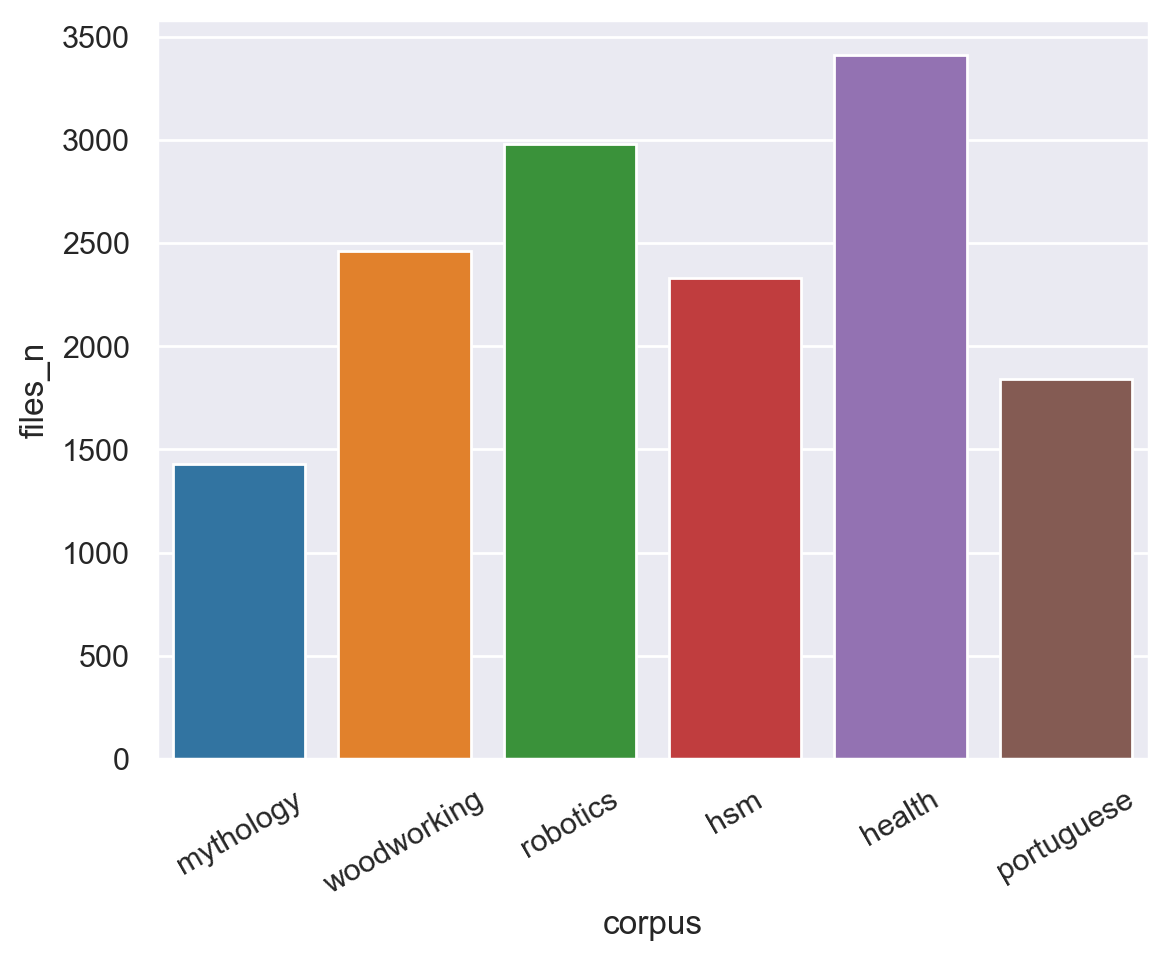

In [11]:
sns.barplot(x=df.index, y="files_n", data=df)
plt.xticks(rotation=30)
plt.show()

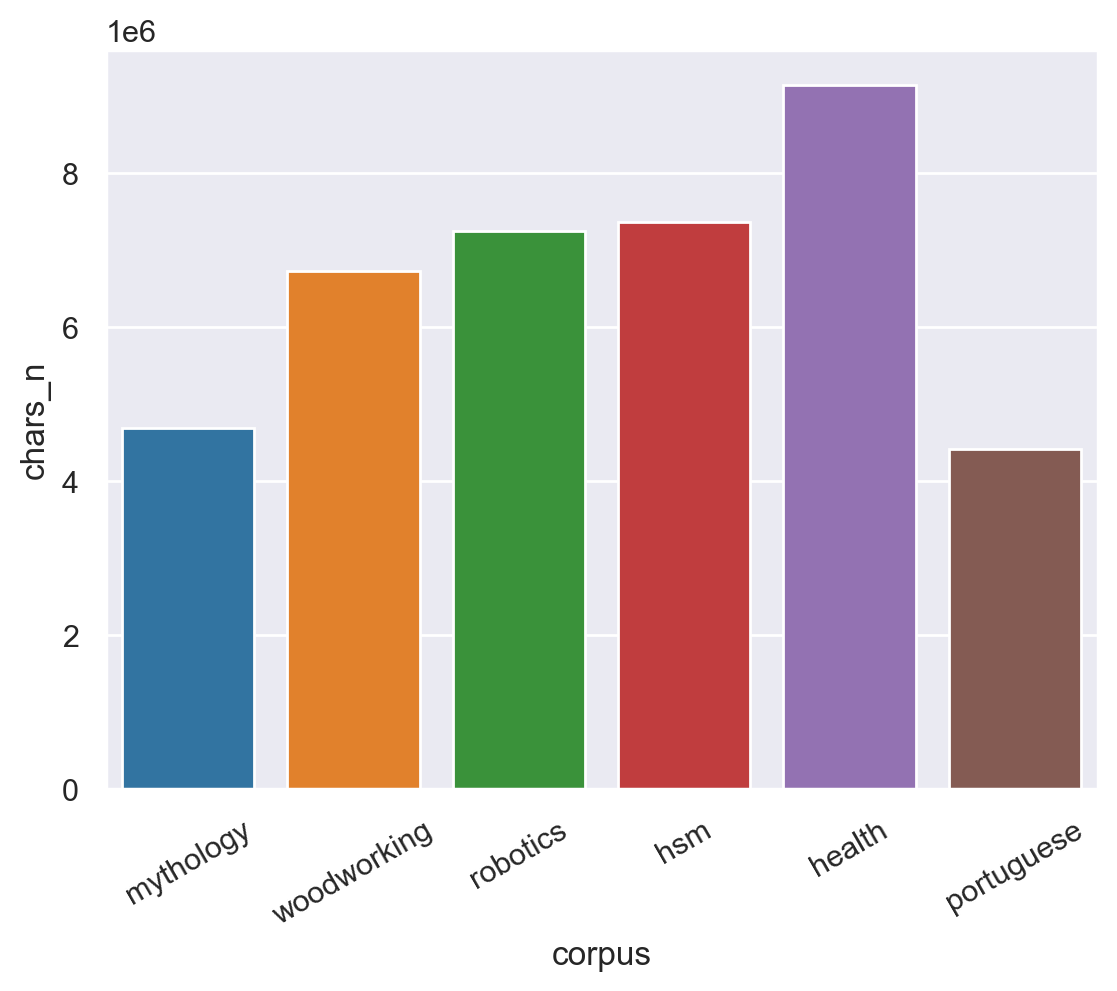

In [12]:
sns.barplot(x=df.index, y="chars_n", data=df)
plt.xticks(rotation=30)
plt.show()

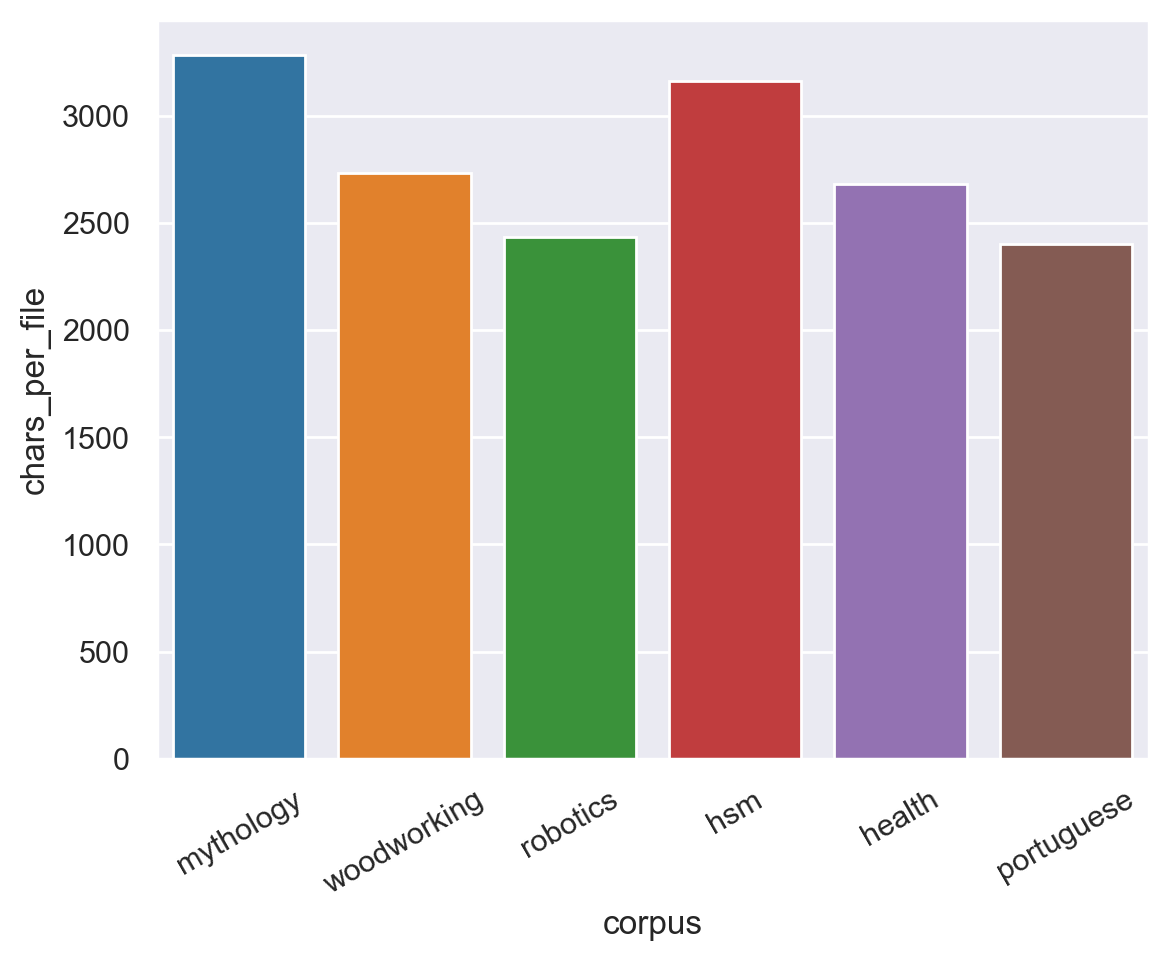

In [13]:
df["chars_per_file"] = df.chars_n / df.files_n
sns.barplot(x=df.index, y="chars_per_file", data=df)
plt.xticks(rotation=30)
plt.show()

In [14]:
char_counters = df.text.map(Counter)

print(char_counters.health)

Counter({' ': 1428190, 'e': 861733, 't': 632823, 'a': 565159, 'i': 546356, 'o': 544730, 'n': 497167, 's': 484696, 'r': 423945, 'h': 298661, 'l': 295594, 'c': 257405, 'd': 255072, 'u': 208547, 'm': 181309, 'f': 155592, 'p': 148135, 'y': 135782, 'g': 131592, 'b': 101865, '\n': 98068, 'w': 96347, '.': 83195, 'v': 80904, ',': 72317, 'k': 42048, 'I': 30666, '-': 25035, 'A': 23297, 'T': 22328, ':': 21092, '0': 20947, ')': 20097, '(': 19763, '1': 19457, 'x': 18488, 'S': 16075, '/': 15770, '2': 15348, 'C': 15331, "'": 14012, 'D': 12043, '?': 10573, 'H': 9790, 'M': 9623, 'P': 9573, '"': 9515, 'R': 8196, 'q': 7768, '3': 7653, '5': 7437, 'W': 7370, 'B': 7203, '9': 7147, 'O': 7116, 'E': 7058, 'N': 6760, 'F': 6620, 'z': 6278, 'j': 6113, '4': 5863, '6': 5305, '8': 4810, 'V': 4775, 'L': 4736, '7': 4692, 'Q': 3892, 'G': 3694, 'U': 3377, '%': 3032, ';': 2444, 'J': 2320, 'Y': 2267, 'K': 1731, ']': 1492, '[': 1490, '’': 1136, '–': 1121, '=': 1110, '_': 962, '&': 887, '“': 690, '”': 684, '!': 587, '+': 58

In [15]:
df["char_types_n"] = char_counters.map(len)
df

,files_n,chars_n,text,chars_per_file,char_types_n
corpus,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437


### Note:
- space 
  - '\u200c' '\u200e' '\u3000' '\xa0' ???
- ascii
- other letters
  - diacritics: ĕ Ł 
- other characters
  - other languages 茶 Ꝣ  ी が
  - symbols €
  - graphical symbols ■
  - emoji ✅ 🤗
- punctuation
  - , ! ≫ '\xad'


In [16]:
# new in 2021: ⃀ (Kyrgyzstani som)
#   (see also https://www.unicode.org/emoji/charts-14.0/emoji-released.html)

for ch in "ĕŁ茶Ꝣीが€,!≫■✅🤗\u200c\u200e\u3000\xa0\xad":
    print(unicodedata.category(ch), ":::", unicodedata.name(ch))

Ll ::: LATIN SMALL LETTER E WITH BREVE
Lu ::: LATIN CAPITAL LETTER L WITH STROKE
Lo ::: CJK UNIFIED IDEOGRAPH-8336
Lu ::: LATIN CAPITAL LETTER VISIGOTHIC Z
Mc ::: DEVANAGARI VOWEL SIGN II
Lo ::: HIRAGANA LETTER GA
Sc ::: EURO SIGN
Po ::: COMMA
Po ::: EXCLAMATION MARK
Sm ::: MUCH GREATER-THAN
So ::: BLACK SQUARE
So ::: WHITE HEAVY CHECK MARK
So ::: HUGGING FACE
Cf ::: ZERO WIDTH NON-JOINER
Cf ::: LEFT-TO-RIGHT MARK
Zs ::: IDEOGRAPHIC SPACE
Zs ::: NO-BREAK SPACE
Cf ::: SOFT HYPHEN


In [17]:
myth_char_freq_df = pd.DataFrame.from_dict(
    char_counters.mythology, orient="index", columns=["freq"]
)
myth_char_freq_df.sort_values("freq", inplace=True, ascending=False)
myth_char_freq_df.index.name = "char"
myth_char_freq_df

,freq
char,
,783629
e,447804
t,312204
a,287794
o,273780
...,...
抱,1
還,1
Ø,1


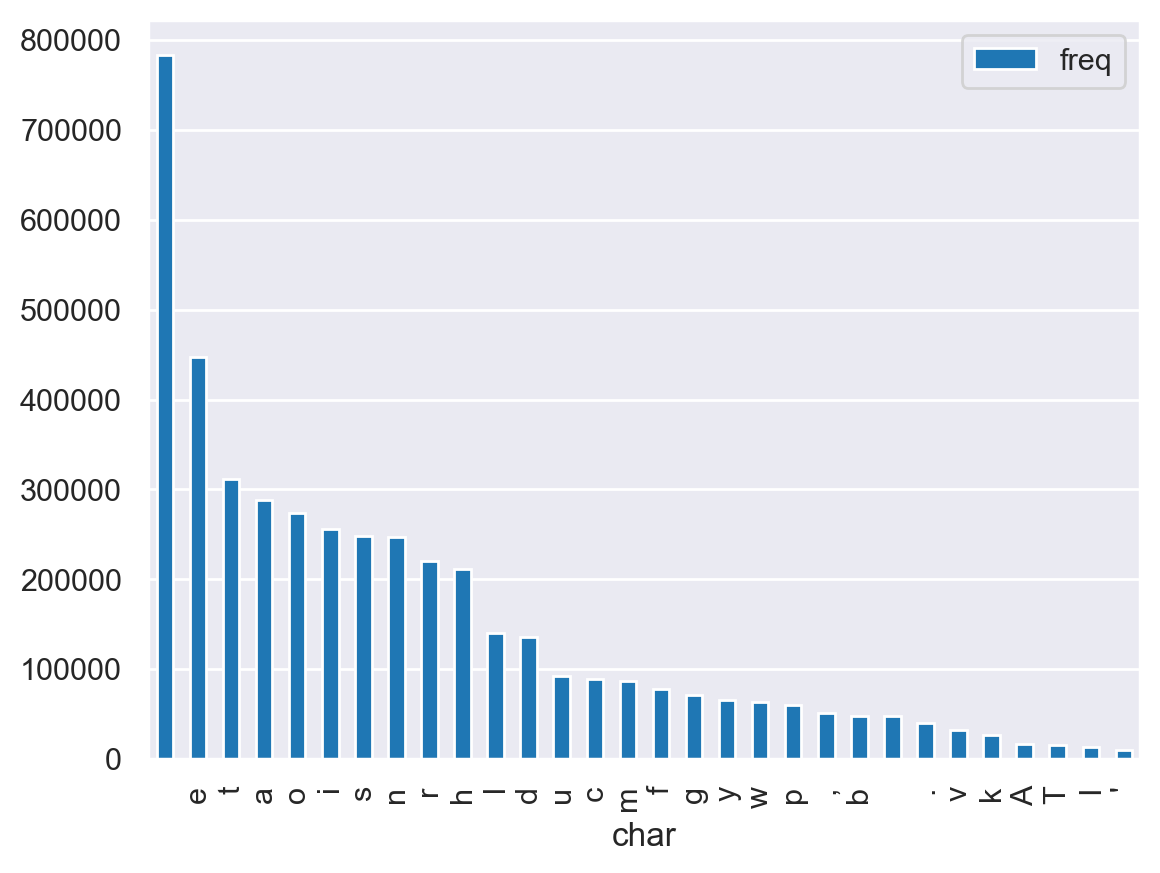

In [18]:
myth_char_freq_df.head(30).plot(kind="bar")
plt.grid(axis="x")
plt.show()

Note that seabord can do the same thing (may arguably looks fancier)

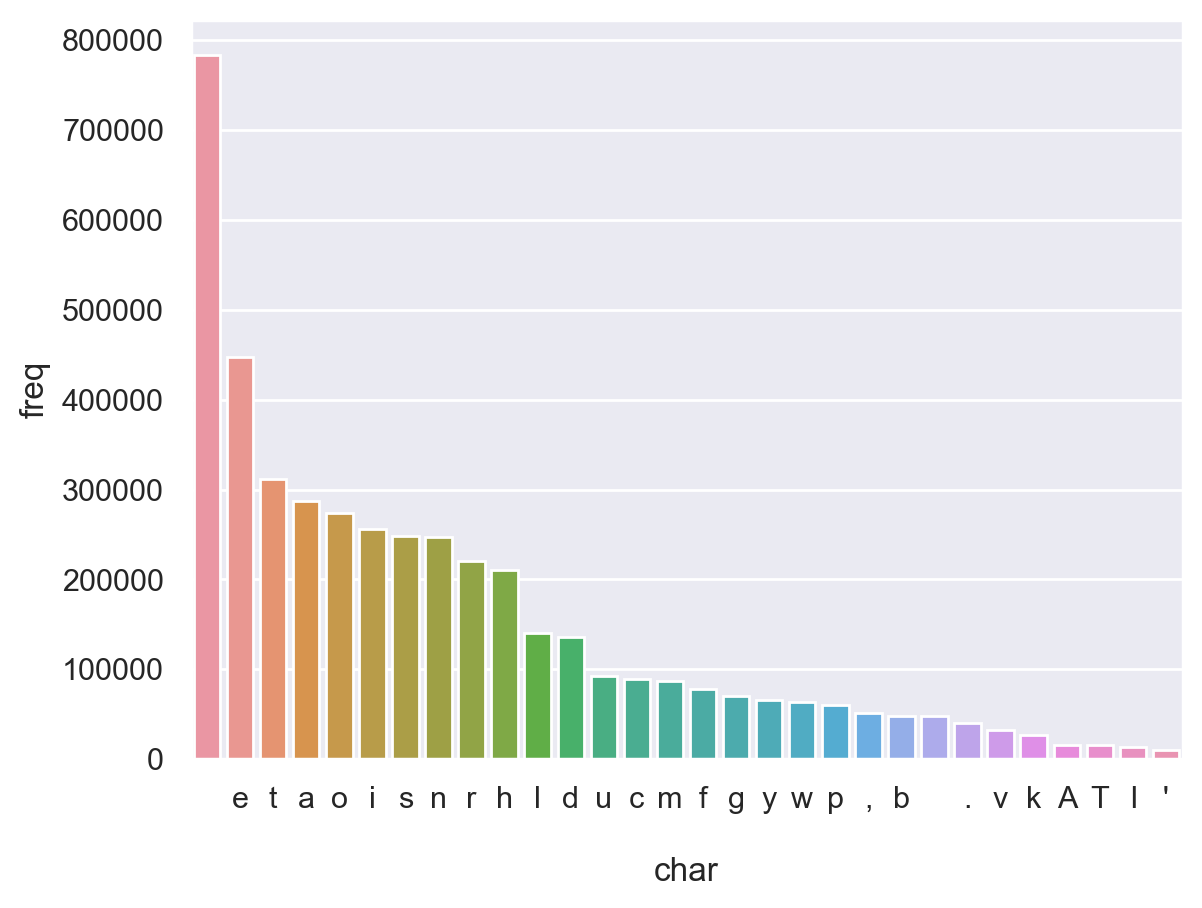

In [19]:
sns.barplot(
    x=myth_char_freq_df.head(30).index,
    y="freq",
    data=myth_char_freq_df.head(30),
)
plt.show()

/Users/evrard/miniconda3/envs/honlp/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


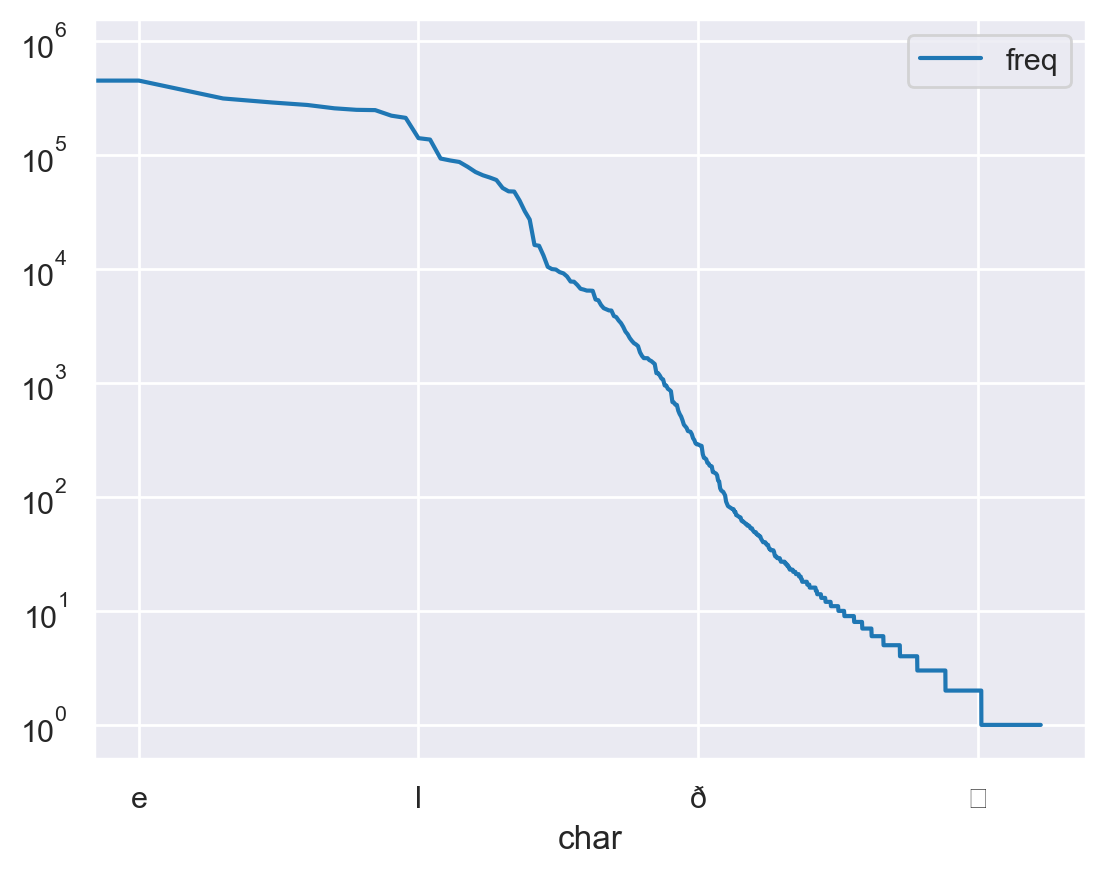

In [20]:
myth_char_freq_df.plot(loglog=True)
plt.show()

In [21]:
df

,files_n,chars_n,text,chars_per_file,char_types_n
corpus,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159
robotics,2981,7254006,Q:\n\nHow is this torque value arrived?\n\nI'm...,2433.41,189
hsm,2329,7364214,"Q:\n\nWhen and why did people stopped using ""n...",3161.96,524
health,3412,9148631,Q:\n\nHelp reading an eyeglass prescription: W...,2681.31,291
portuguese,1840,4415251,"Q:\n\nQual a origem da expressão ""o fim da pic...",2399.59,437


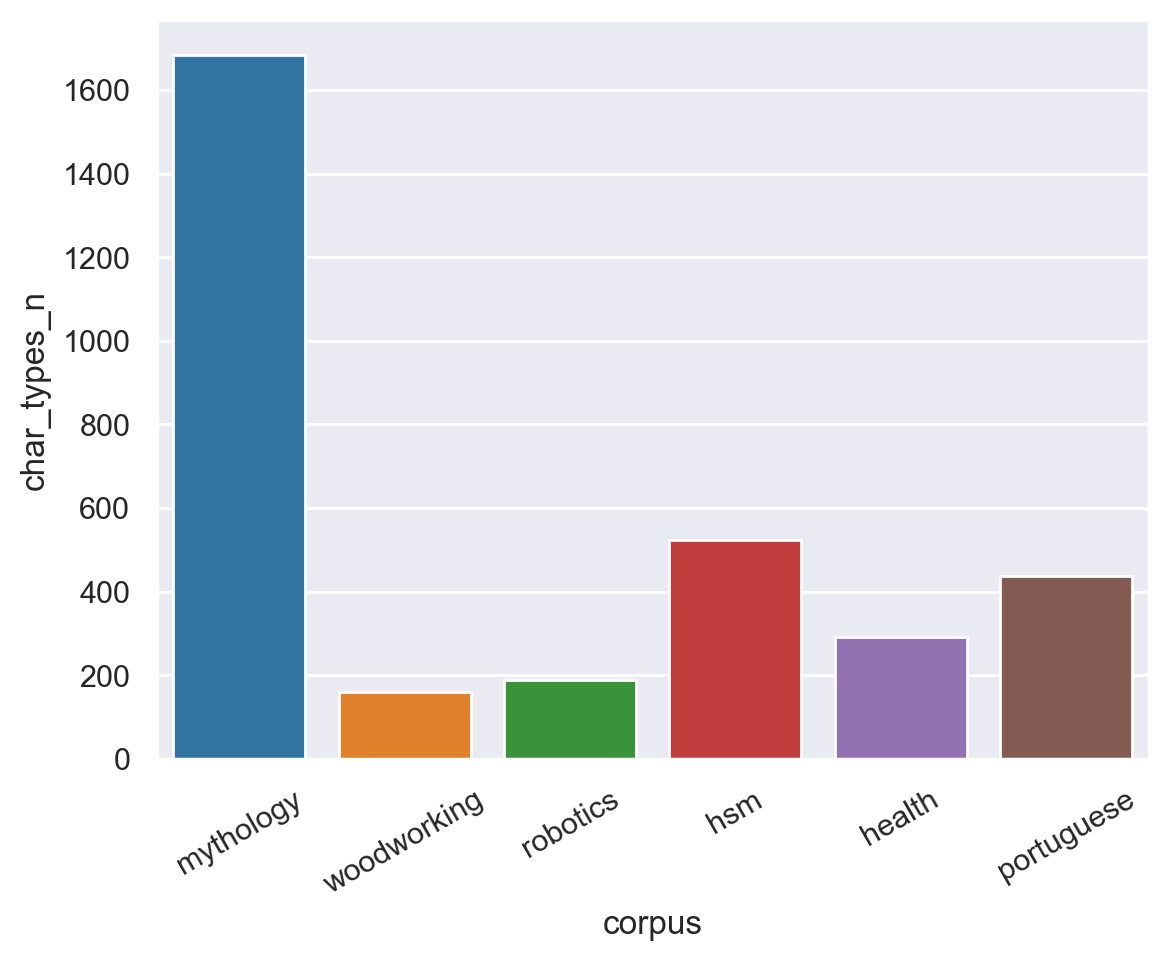

In [22]:
sns.barplot(x=df.index, y="char_types_n", data=df)
plt.xticks(rotation=30)
plt.show()

#### How to compute richness in characters?

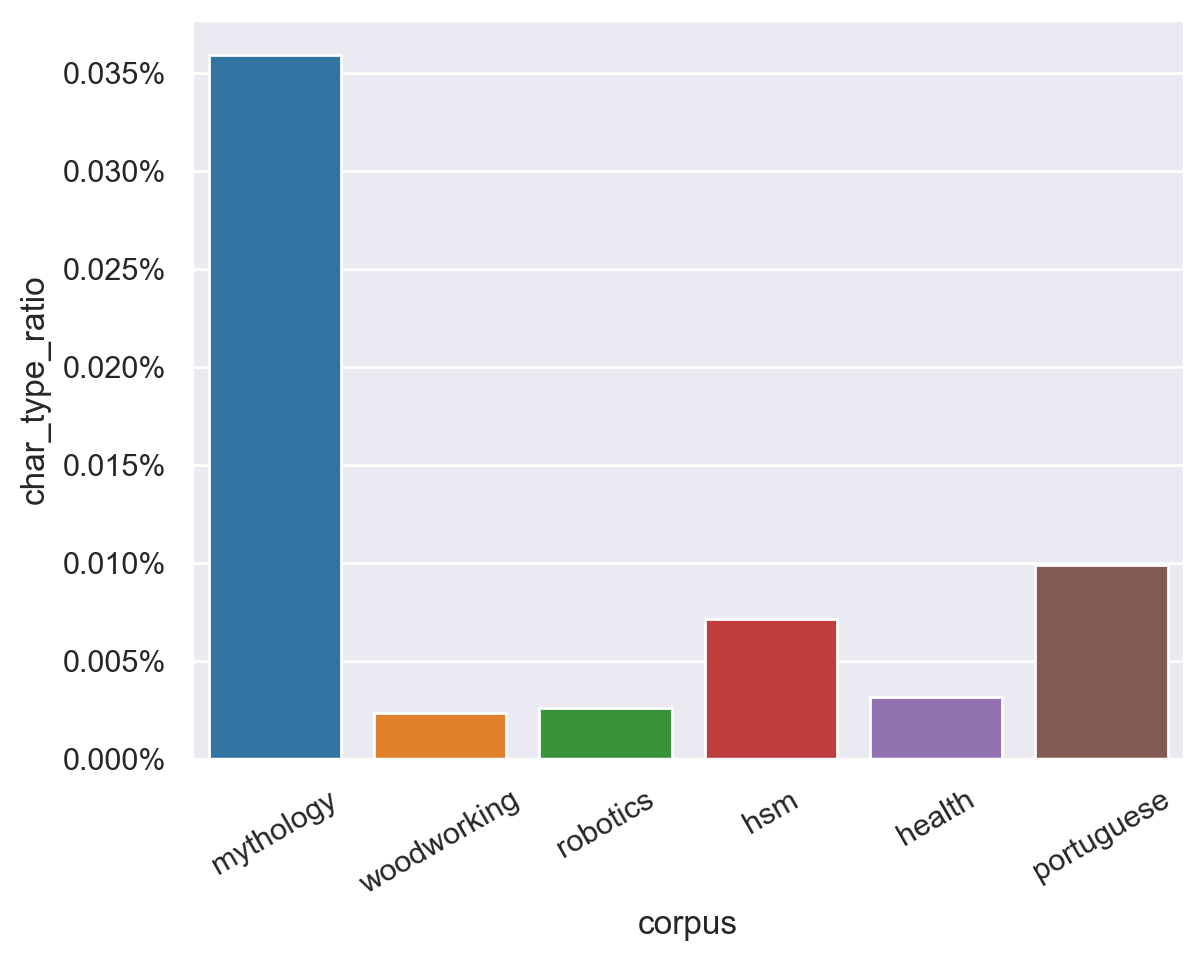

In [23]:
df["char_type_ratio"] = df.char_types_n / df.chars_n
ax = sns.barplot(x=df.index, y="char_type_ratio", data=df)
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1, decimals=3))
plt.xticks(rotation=30)
plt.show()

In [24]:
char_counters = df.text.map(lambda x: Counter(x[:1000]))
print(char_counters.health)
df["type_chars_1000"] = char_counters.map(len)

Counter({' ': 151, 'e': 80, 'i': 67, 't': 66, 'o': 64, 'a': 57, 'n': 54, 's': 49, 'r': 48, 'l': 33, 'h': 29, 'c': 27, 'f': 23, '\n': 22, 'd': 22, 'g': 21, 'y': 18, 'u': 17, 'p': 13, 'm': 13, 'b': 10, '.': 9, 'w': 8, ':': 6, '9': 6, 'P': 5, 'S': 5, 'v': 5, ',': 5, '"': 4, '(': 4, ')': 4, 'T': 4, '0': 4, '1': 4, 'W': 3, 'L': 3, 'I': 3, 'A': 3, '-': 3, 'k': 3, '7': 3, 'Q': 2, 'H': 2, 'C': 2, '?': 2, "'": 2, 'R': 2, 'E': 2, 'O': 1, 'Y': 1, 'M': 1, '“': 1, '‘': 1, '’': 1, '”': 1, 'B': 1})


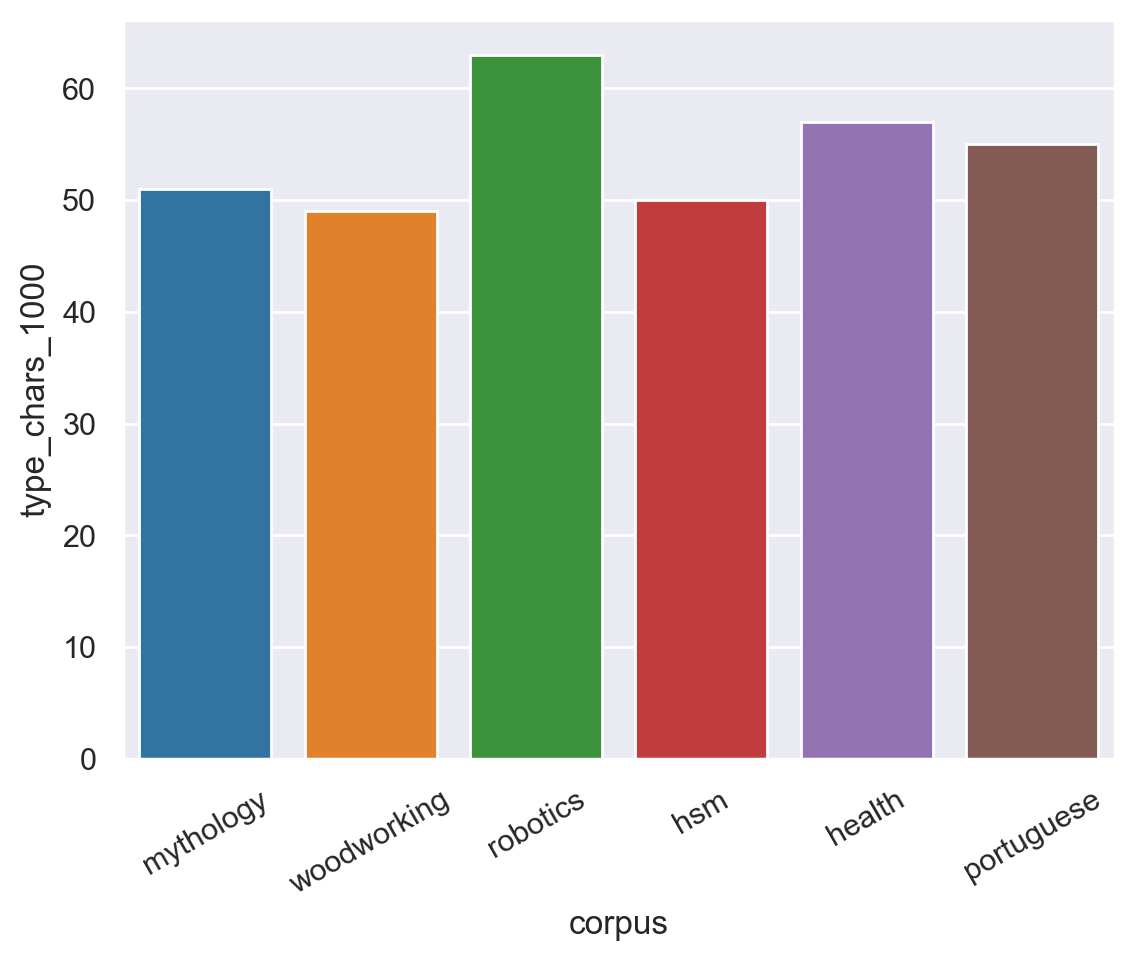

In [25]:
sns.barplot(x=df.index, y="type_chars_1000", data=df)
plt.xticks(rotation=30)
plt.show()

### What's going on here? Which text is the richest in characters?

In [26]:
HOP = 100_000

In [27]:
def batch_counts(text, max_len, hop):
    counters = [Counter()]
    for i in range(hop, max_len, hop):
        counters.append(counters[-1] + Counter(text[i - hop : i]))
    return [len(cntr) for cntr in counters]

In [28]:
df.head(2)

,files_n,chars_n,text,chars_per_file,char_types_n,char_type_ratio,type_chars_1000
corpus,,,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684,3.59e-04,51
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159,2.36e-05,49


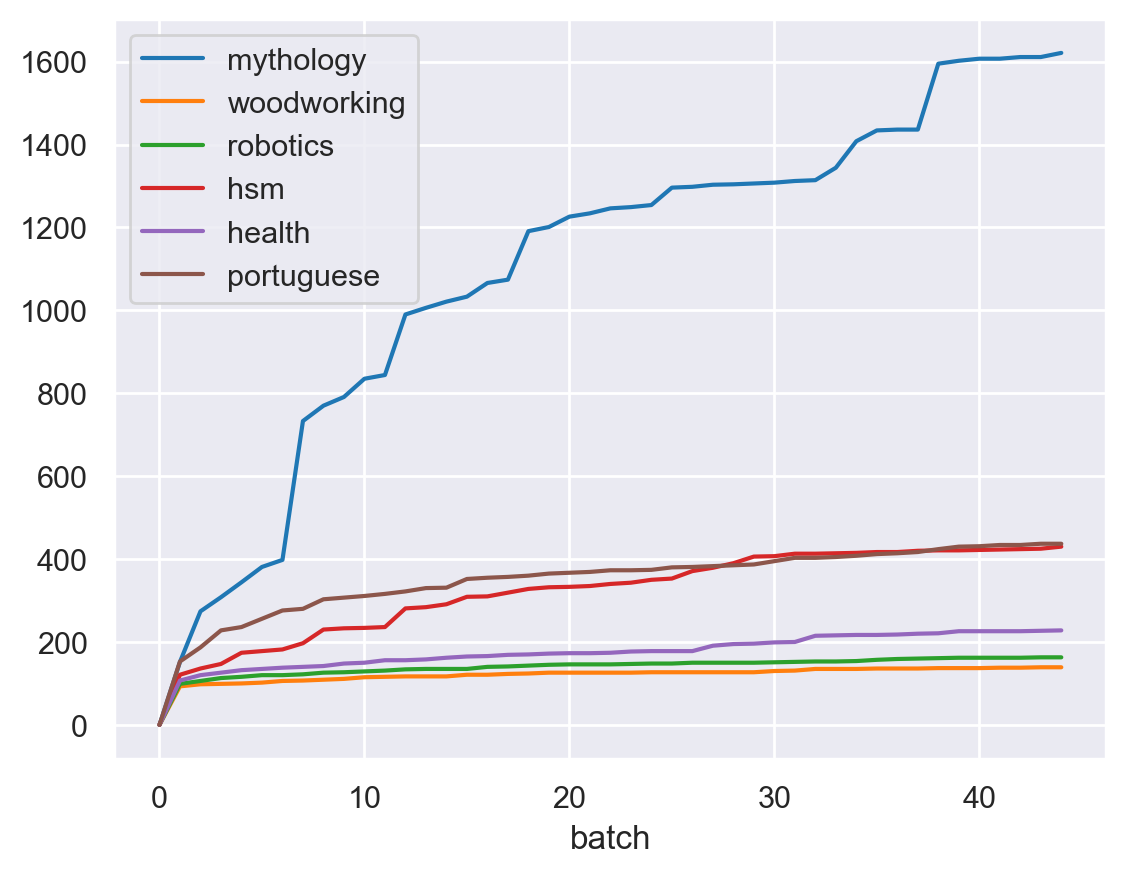

In [29]:
batch_counters = df.text.map(
    lambda x: batch_counts(x, max_len=df.chars_n.min(), hop=HOP)
)

batch_counters_df = pd.DataFrame(
    dict(zip(batch_counters.index, batch_counters.values))
)
batch_counters_df.index.name = "batch"

batch_counters_df.plot()
plt.show()

- Zooming in:

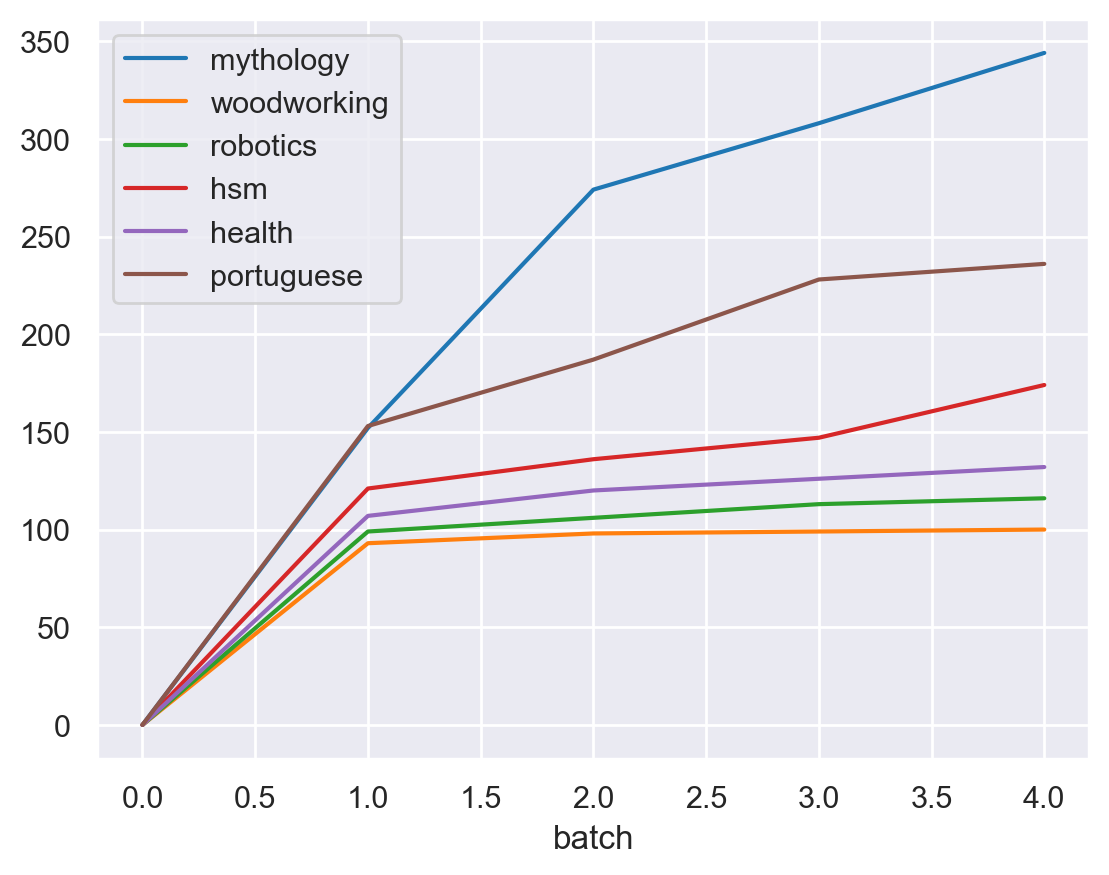

In [30]:
batch_counters_df.head(5).plot()
plt.show()

### What's happening here?
#### 🚧 TODO:

Give some explanation

___

- Mythology is a very special corpus because it has new characters by badges, probably because it contains texts about different myths from different culture, including also the original writing.

- Portuguese is holding second place in the beginning because it contains text mixing two languages and portuguese has different diacritcs.

- History of science and mathematics also contains many new characters, but just as all the other character measures, it stabilizes asymptotically.

- It does not come as a surprise that woodworking has the least rich character set.

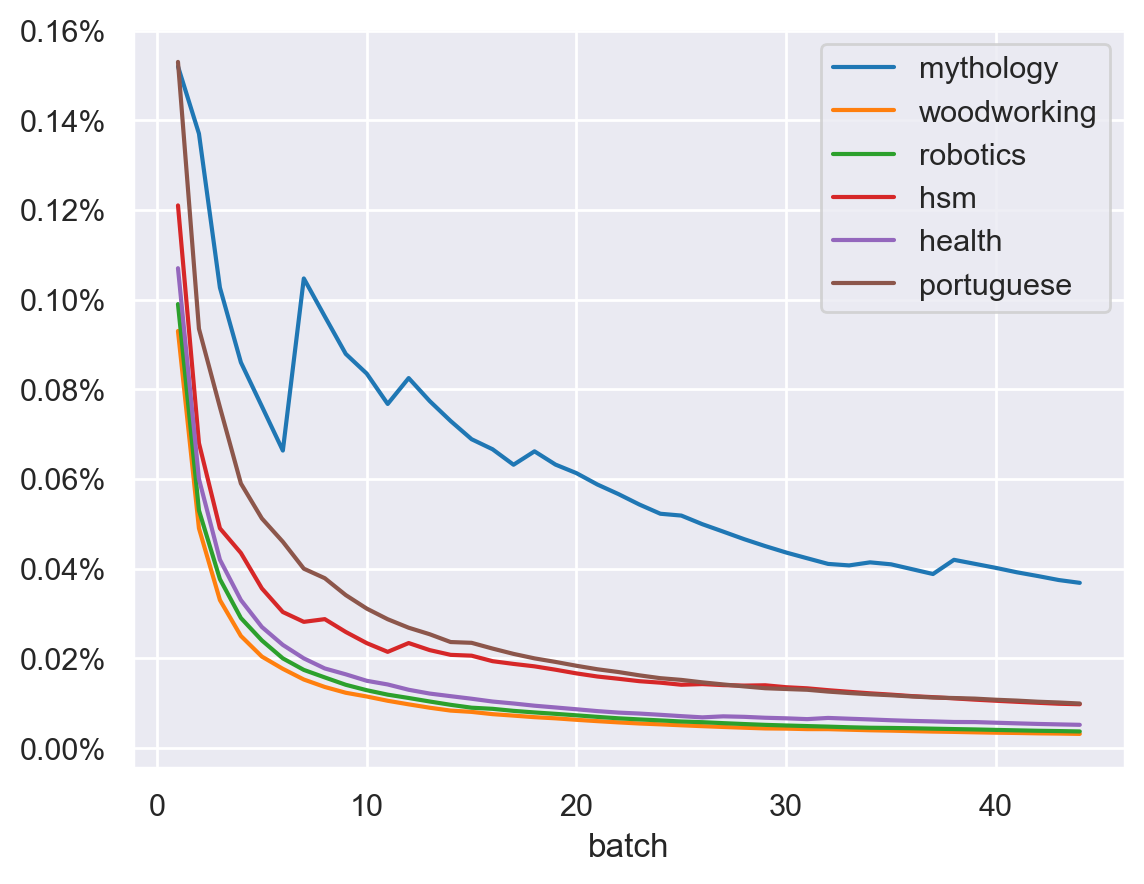

In [31]:
batches = np.arange(0, df.chars_n.min(), HOP)
batch_counters_freq_df = batch_counters_df.divide(batches, axis="index")
ax = batch_counters_freq_df.plot()
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(1, decimals=2))
plt.show()

- We see three levels on which these lines seem to stabilize: 
  
  - mythology
  
  - portoguese and hsm
  
  - robotics, health, and woodworking

---

# Tokens and words

### Tokenizing

In [32]:
text = "Let's all together defeat last years' problem, SARS-CoV-2, in 2023!"
token_splits = text.split()

print("|".join(token_splits))
len(token_splits)

Let's|all|together|defeat|last|years'|problem,|SARS-CoV-2,|in|2023!


10

In [33]:
chars_re = re.compile(r"\W+")
token_splits = chars_re.split(text)

print("|".join(token_splits))
len(token_splits)

Let|s|all|together|defeat|last|years|problem|SARS|CoV|2|in|2023|


14

In [34]:
char_or_hyphen_re = re.compile(r"[\w-]+")
token_splits = char_or_hyphen_re.findall(text)

print("|".join(token_splits))
len(token_splits)

Let|s|all|together|defeat|last|years|problem|SARS-CoV-2|in|2023


11

Idiosyncratic rules for English!

- Think of *viens-tu*, *où va-text-il*, *Kaffeetasse*, *cantolo*, *我爱你*, ...

- Can you think of other cases in your language where the tokenizer does not work? What does the tokenizer do?

### Using a specialized class: `nltk`

In [35]:
nltk_tokens = word_tokenize(text)

print("|".join(nltk_tokens))
len(nltk_tokens)

Let|'s|all|together|defeat|last|years|'|problem|,|SARS-CoV-2|,|in|2023|!


15

### Not bad. Does it work for Portuguese?

In [36]:
pt_tokens = word_tokenize(corpora["portuguese"][:333])

print("|".join(pt_tokens))
len(pt_tokens)

Q|:|Qual|a|origem|da|expressão|``|o|fim|da|picada|''|?|Se|,|em|geral|,|``|picada|''|é|uma|coisa|negativa|,|pois|remete|a|dor|e|coceira|,|como|pode|ser|que|``|o|fim|da|picada|''|seja|uma|expressão|também|negativa|?|A|:|Picada|(|Aulete|,|3|)|é|também|“|caminho|aberto|em|mata|fechada|a|golpes|de|facão|ou|foice|”|.|E|a|minha|interpretação|foi|sempre|que|o|f


83

Watch out: do = de + o

**And it's slow!**

In [37]:
toks = [
    word_tokenize(text[:1_000_000]) for corpus, text in tqdm(corpora.items())
]

  0%|          | 0/6 [00:00<?, ?it/s]

So be patient for this line:

In [38]:
# If your machine is slow, pickeling allows to go faster next time.
# On my ubuntu i7 it takes 40 seconds

tokens_fp = DATA / "tokens.pkl"
try:
    tokens = pd.read_pickle(tokens_fp)
except FileNotFoundError:
    tokens = df.text.progress_map(word_tokenize)
    tokens.to_pickle(tokens_fp)

In [39]:
df["tokens"] = tokens
df["tokens_n"] = df.tokens.map(len)
df["types_n"] = df.tokens.map(set).map(len)
df.head(2)

,files_n,chars_n,text,chars_per_file,char_types_n,char_type_ratio,type_chars_1000,tokens,tokens_n,types_n
corpus,,,,,,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684,3.59e-04,51,"[Q, :, Can, anyone, identify, what, Chinese, m...",942611,51243
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159,2.36e-05,49,"[Q, :, Glue-up, for, butcher, block-style, cou...",1390534,32316


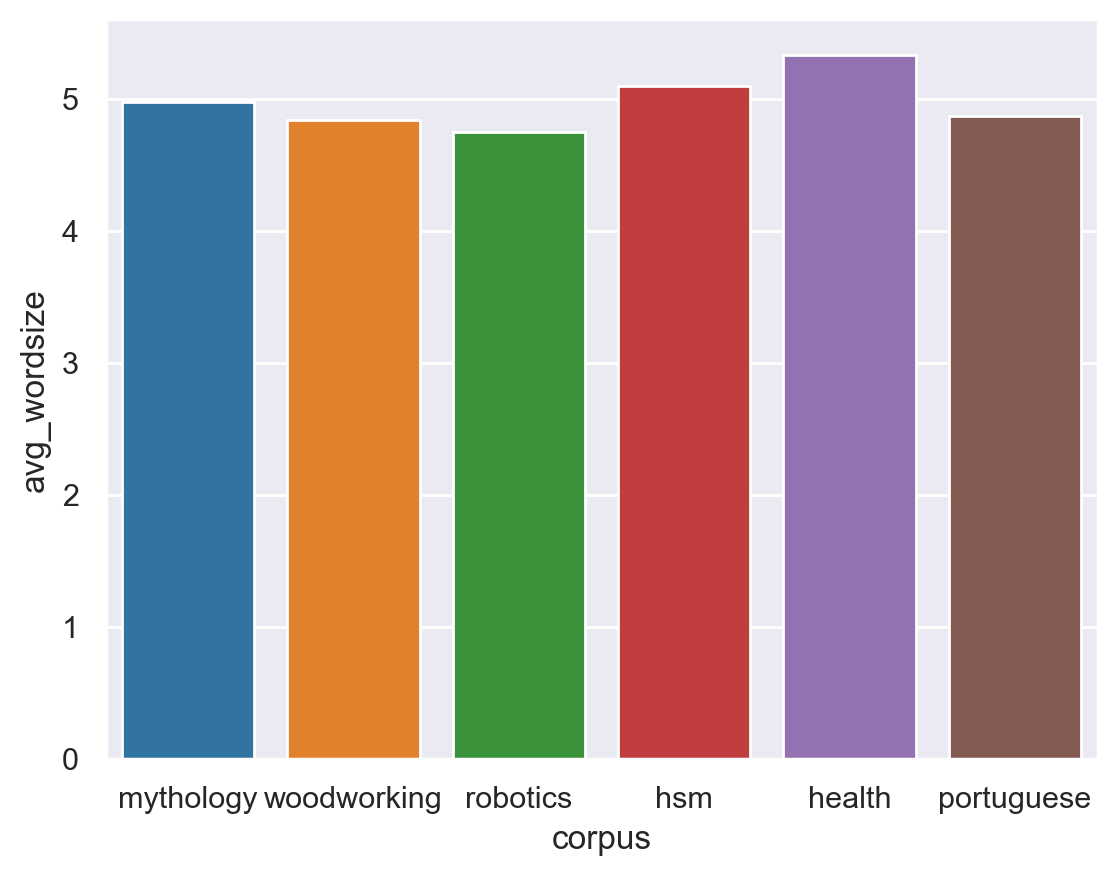

In [40]:
df["avg_wordsize"] = df.chars_n / df.tokens_n
sns.barplot(x=df.index, y="avg_wordsize", data=df)
plt.show()

In [41]:
word_ctr = Counter(df.tokens.mythology)
myth_tok_freq_df = pd.DataFrame.from_dict(
    word_ctr, orient="index", columns=["freq"]
)
myth_tok_freq_df.sort_values("freq", inplace=True, ascending=False)
myth_tok_freq_df.index.name = "token"
myth_tok_freq_df.head()

,freq
token,
the,51133
",",51118
.,33184
of,29559
and,21018


In [42]:
word_ctr = Counter(df.tokens.woodworking)
wood_tok_freq_df = pd.DataFrame.from_dict(
    word_ctr, orient="index", columns=["freq"]
)
wood_tok_freq_df.sort_values("freq", inplace=True, ascending=False)
wood_tok_freq_df.index.name = "token"
wood_tok_freq_df.head()

,freq
token,
the,65222
.,52199
",",41321
to,38592
a,37003


### Frequency of word length

#### 🚧 TODO

- Give the average length of tokens per corpus - clearly define what average you measure!

- Give the longest word per corpus and give their length

**Note:**

- We can compute the average length over tokens or types. As frequent words are shorter, we expect the average length over tokens to be smaller than over types.

In [43]:
# One liners:

word_ctr = Counter(df.tokens.mythology)
print(
    f"average length in the dictionary (on types): "
    f"{sum([len(t) for t in word_ctr]) / len(word_ctr):.2f}"
)
print(
    "average length in the text (on tokens): "
    f"{sum([len(t) * f for t, f in word_ctr.items()]) / sum(word_ctr.values()):.2f}"
)
print(
    "the longest words: ",
    sorted(word_ctr, key=lambda x: len(x), reverse=True)[:10],
)

average length in the dictionary (on types): 7.72
average length in the text (on tokens): 4.10
the longest words:  ['亮乃北行見備，備與亮非舊，又以其年少，以諸生意待之。坐集既畢，眾賓皆去，而亮獨留，備亦不問其所欲言。備性好結毦，時適有人以髦牛尾與備者，備因手自結之。亮乃進曰：「明將軍當復有遠志，但結毦而已邪！」備知亮非常人也，乃投毦而答曰：「是何言與！我聊以忘憂耳。」亮遂言曰：「將軍度劉鎮南孰與曹公邪？」備曰：「不及。」亮又曰：「將軍自度何如也？」備曰：「亦不如。」曰：「今皆不及，而將軍之眾不過數千人，以此待敵，得無非計乎！」備曰：「我亦愁之，當若之何？」亮曰：「今荊州非少人也，而著籍者寡，平居發調，則人心不悅；可語鎮南，令國中凡有游戶，皆使自實，因錄以益眾可也。」備從其計，故眾遂強。備由此知亮有英略，乃以上客禮之。', '禹理水，三至桐柏山，驚風走雷，石號木鳴，五伯擁川，天老肅兵，不能興。禹怒，召集百靈，搜命夔龍，桐柏千君長稽首請命，禹因囚鴻蒙氏、章商氏、兜盧氏、犁婁氏，乃獲淮渦水神，名無支祁，善應對言語，辨江淮之淺深、原隰之遠近。形若猿猴，縮鼻高額，青軀白首，金目雪牙，頸伸百尺，力逾九象，搏擊騰踔疾奔，輕利倏忽，聞視不可久，禹授之章律，不能制，授之鳥木由，不能制，授之庚辰，能制。鴟脾桓木魅水靈，山妖石怪，奔號聚繞，以數千載，庚辰以戰逐去，頸鎖大索，鼻穿金鈴，徙淮陰之龜山之足下', '時有漁人，夜釣於龜山之下，其釣因物所制，不複出。漁者健水，疾沉於下五十丈，見大鐵鎖，盤繞山足，尋不知極，遂告湯。湯命漁人及能水者數十，獲其獲，力莫能制，加以牛五十餘頭，鎖乃振動，稍稍就岸。時無風濤，驚浪翻湧，觀者大駭，鎖之末，見一獸，狀有如猿，白首長口，雪牙金爪，闖然上岸。高五丈許，蹲踞之狀若猿猴，但兩目不能開，兀若昏昧，目鼻水流如泉，涎沫腥穢，人不可近。久乃引頸伸欠，雙目忽開，光彩若電，顧視人焉，欲發狂怒，觀者奔走，獸亦徐徐引鎖，拽牛入水去，竟不複出', '//www.thetaxidermystore.com/media/catalog/product/cache/1/image/9df78eab33525d08d6e5fb8d27136e95/o/c/ocell

In [44]:
# Seperate functions that can be reused for each text:


def avg_len_tokens(words):
    len_words = [len(w) for w in words]
    return sum(len_words) / len(len_words)


def max_len_tokens(words):
    len_words = [len(w) for w in words]
    return max(len_words)


def longest_words(words):
    len_words = [len(w) for w in words]
    return words[len_words.index(max(len_words))]

In [45]:
print("\n*** average length in the dictionary (on types) ***")
display(tokens.map(avg_len_tokens))

print("\n*** average length in the text (on tokens) ***")
display(tokens.map(set).map(avg_len_tokens))


*** average length in the dictionary (on types) ***


corpus
mythology      4.10
woodworking    3.94
robotics       3.89
hsm            4.26
health         4.45
portuguese     4.04
Name: text, dtype: float64


*** average length in the text (on tokens) ***


corpus
mythology       7.72
woodworking     8.26
robotics        9.03
hsm             8.25
health         10.03
portuguese      7.98
Name: text, dtype: float64

In [46]:
print("\n*** the longest words ***")
display(tokens.map(max_len_tokens))

print("\n*** the longest words ***")
for word in tokens.map(longest_words):
    print(word)

max_len = tokens.map(max_len_tokens).max()


*** the longest words ***


corpus
mythology      305
woodworking    137
robotics       199
hsm            178
health         265
portuguese     125
Name: text, dtype: int64


*** the longest words ***
亮乃北行見備，備與亮非舊，又以其年少，以諸生意待之。坐集既畢，眾賓皆去，而亮獨留，備亦不問其所欲言。備性好結毦，時適有人以髦牛尾與備者，備因手自結之。亮乃進曰：「明將軍當復有遠志，但結毦而已邪！」備知亮非常人也，乃投毦而答曰：「是何言與！我聊以忘憂耳。」亮遂言曰：「將軍度劉鎮南孰與曹公邪？」備曰：「不及。」亮又曰：「將軍自度何如也？」備曰：「亦不如。」曰：「今皆不及，而將軍之眾不過數千人，以此待敵，得無非計乎！」備曰：「我亦愁之，當若之何？」亮曰：「今荊州非少人也，而著籍者寡，平居發調，則人心不悅；可語鎮南，令國中凡有游戶，皆使自實，因錄以益眾可也。」備從其計，故眾遂強。備由此知亮有英略，乃以上客禮之。
//www.hafele.com/us/en/products/furniture-kitchen-living-solutions/connectors-shelf-supports/connectors/00c4d561f3ac98e261a2fcbcc8b0c2de/
//helgewurdemann.files.wordpress.com/2014/10/embc-2015-embedded-electro-conductive-yarn-for-shape-sensing-of-soft-manipulators-wurdemann-sareh-shafti-noh-faragasso-chathuranga-liu-hirai-althoefer.pdf
//www.quora.com/What-are-the-ways-to-understand-the-proof-that-there-is-no-formula-for-expressing-the-roots-of-the-general-quintic-equation-via-radicals/answer/Bassam-Karzeddin-1
//www.researchgate.net/profile/Secil_Vural/publication/320317367_Long-Term_Follow-Up_Results_of_Topical_Imiquimod_Treatment_in_Basal_Cell_Carcinoma/li

#### We can try to remove all non-ascii characters to get to actual long words

In [47]:
wood_tok_freq_df["len"] = wood_tok_freq_df.index.str.len()
wood_tok_filtered_df = wood_tok_freq_df[
    ~wood_tok_freq_df.index.str.contains(r"[0-9/=+\._-]")
]
wood_tok_filtered_df.sort_values(by="len", ascending=False).head(10)

,freq,len
token,,
halfdovetaillapjoints,1,21
GraphussupportsMonica,1,21
CrazyRussianWoodShop,1,20
AloysiusDefenestrate,1,20
curiouslysatisfying,1,19
CanadianWoodworking,1,19
PopularWoodworking,1,18
oversimplification,3,18
GreatPlanesTrading,1,18


- Yay! we found "disproportionately"!

#### 🚧 TODO: Let's process all corpora to get their word length distribution

In [48]:
def len_freq_counter(text):
    len_freq = {}
    word_ctr = Counter(text)
    for text, _freq in word_ctr.items():
        len_freq[len(text)] = (
            len_freq.get(len(text), 0) + 1
        )  # if replacing +1 by + freq => length/freq relation
    return len_freq

max_len = tokens.map(max_len_tokens).max()

len_freq_df = pd.DataFrame(index=range(1, max_len + 1))
len_freq_df.index.name = "token length"

for corpus, row in df.iterrows():
    len_freq_df[corpus] = pd.Series(len_freq_counter(row.tokens))

In [49]:
len_freq_df

,mythology,woodworking,robotics,hsm,health,portuguese
token length,,,,,,
1,185.0,110.0,138.0,245.0,156.0,221.0
2,736.0,548.0,1873.0,1356.0,1188.0,1070.0
3,2176.0,1520.0,4416.0,3530.0,3346.0,2500.0
4,4390.0,2769.0,4831.0,4915.0,5187.0,4309.0
5,5944.0,3434.0,5340.0,6124.0,5749.0,6174.0
...,...,...,...,...,...,...
301,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,NaN,NaN,NaN,NaN,NaN
303,NaN,NaN,NaN,NaN,NaN,NaN


- Note: There is quite a few NaN!

#### 🚧 TODO: Let's plot the mythology word length distribution

In [50]:
myth_len_freqs = len_freq_df.mythology.sort_values(ascending=False)
myth_len_freqs.head(5)

token length
7    7345.0
6    7048.0
8    6383.0
5    5944.0
9    5417.0
Name: mythology, dtype: float64

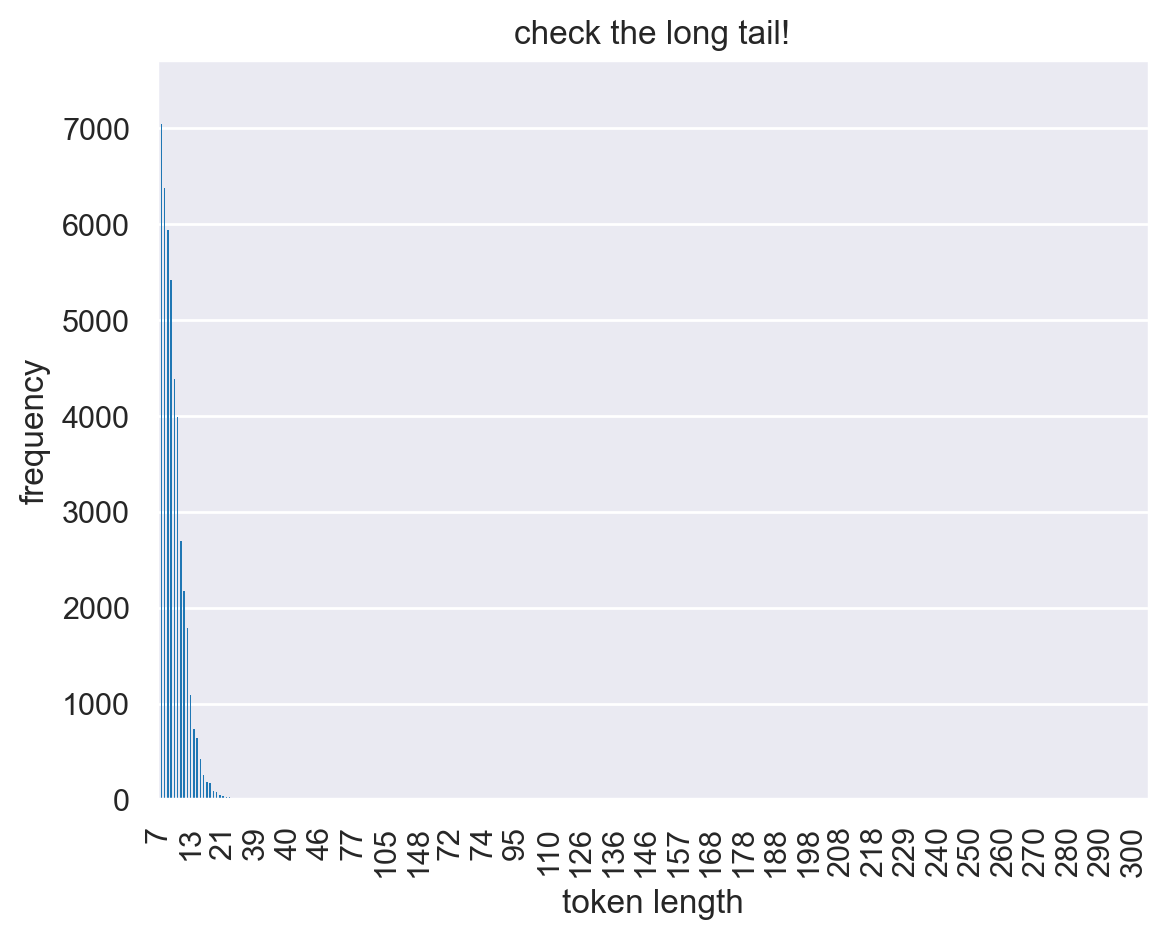

In [51]:
ax = myth_len_freqs.plot.bar(title="check the long tail!", linewidth=0)

# Print only 1 x-tick-label out of 10
for i, label in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        label.set_visible(False)

plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

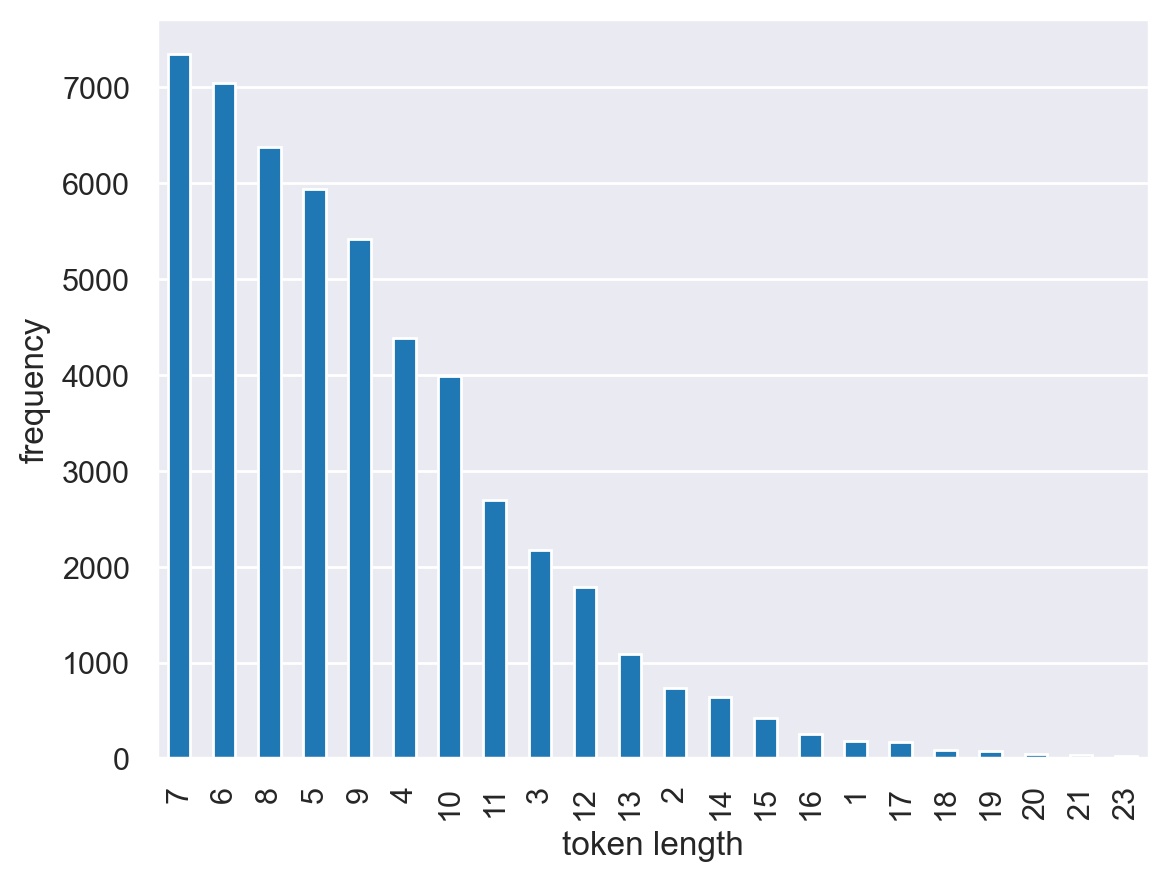

token length
7    7345.0
6    7048.0
8    6383.0
5    5944.0
9    5417.0
Name: mythology, dtype: float64

In [52]:
myth_len_freqs.head(22).plot.bar()
plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

myth_len_freqs.head(5)

- If you order by token length you get a nice curve, something close to the hypergeometric distribution:

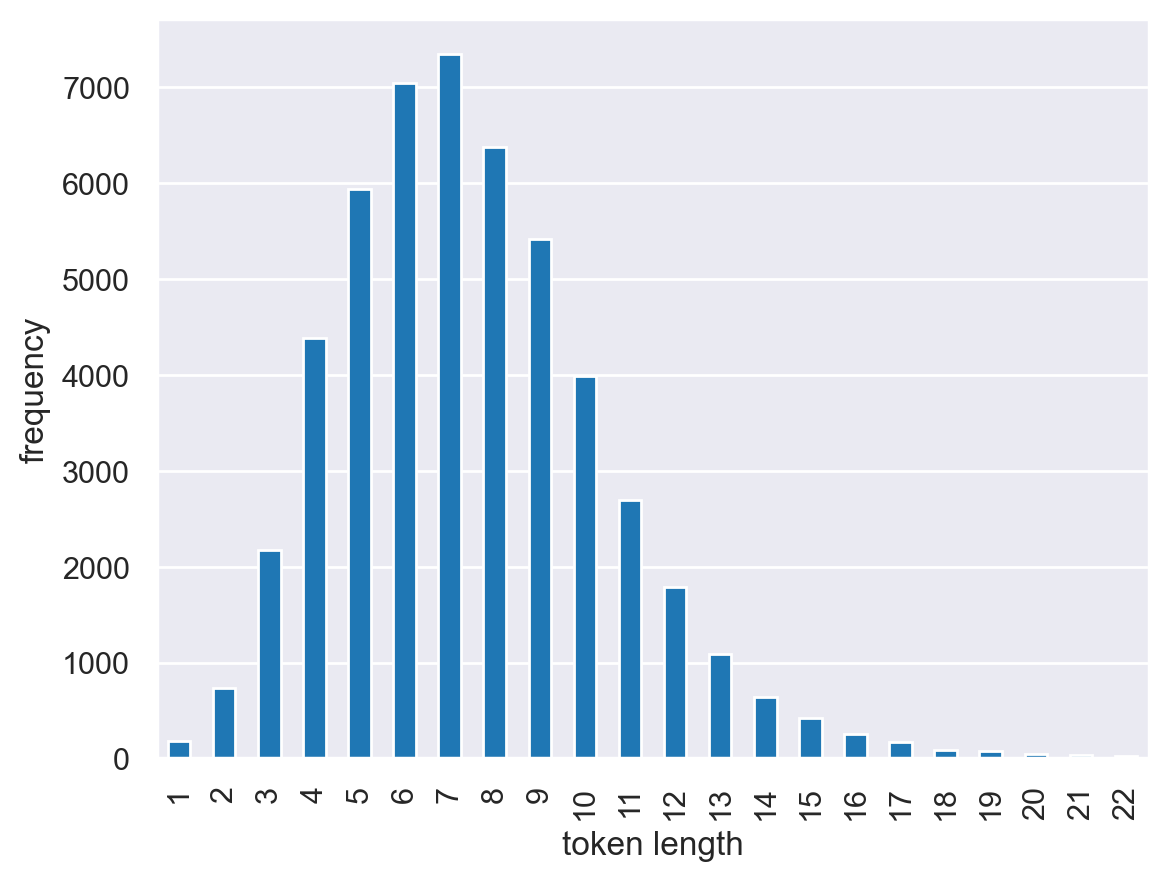

In [53]:
len_freq_df.mythology.head(22).plot.bar()
plt.ylabel("frequency")
plt.grid(axis="x")
plt.show()

# 💥 Let's Zipf it!

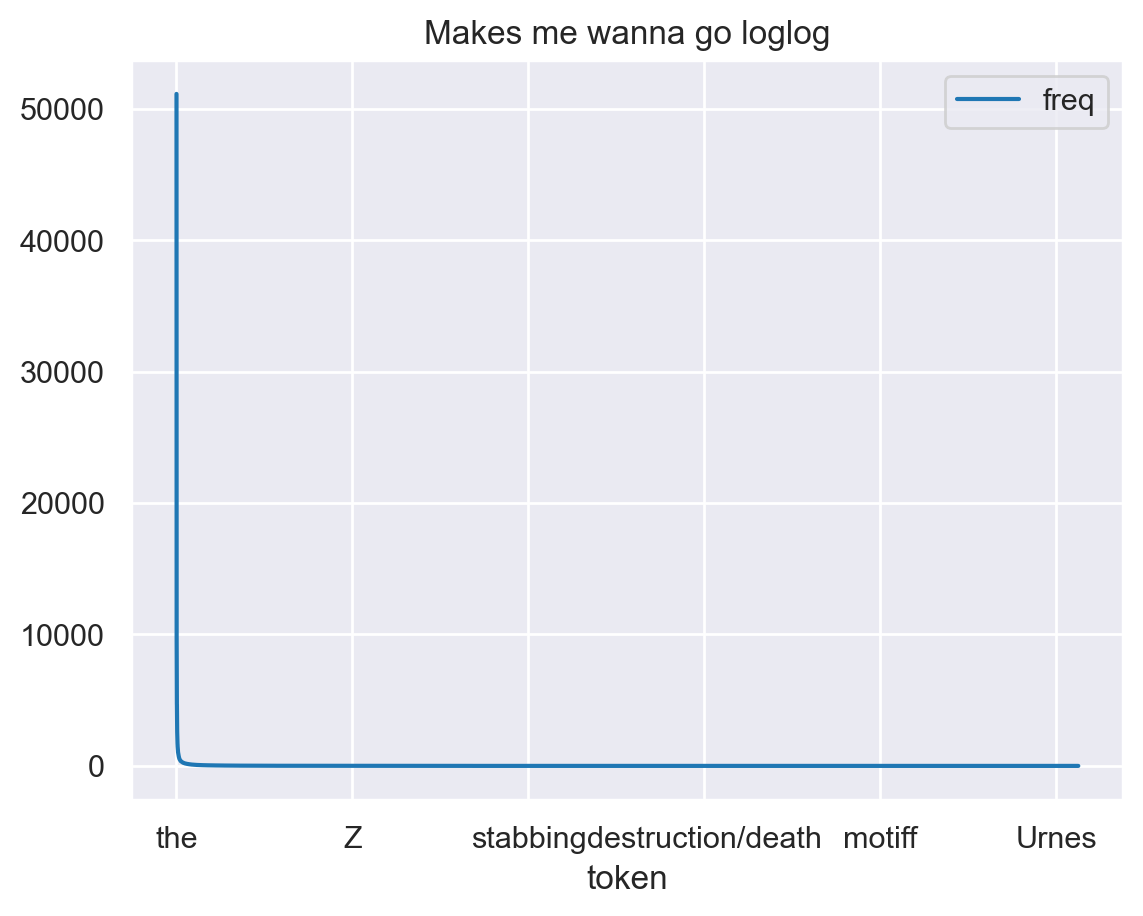

In [54]:
myth_tok_freq_df.plot(title="Makes me wanna go loglog")
plt.show()

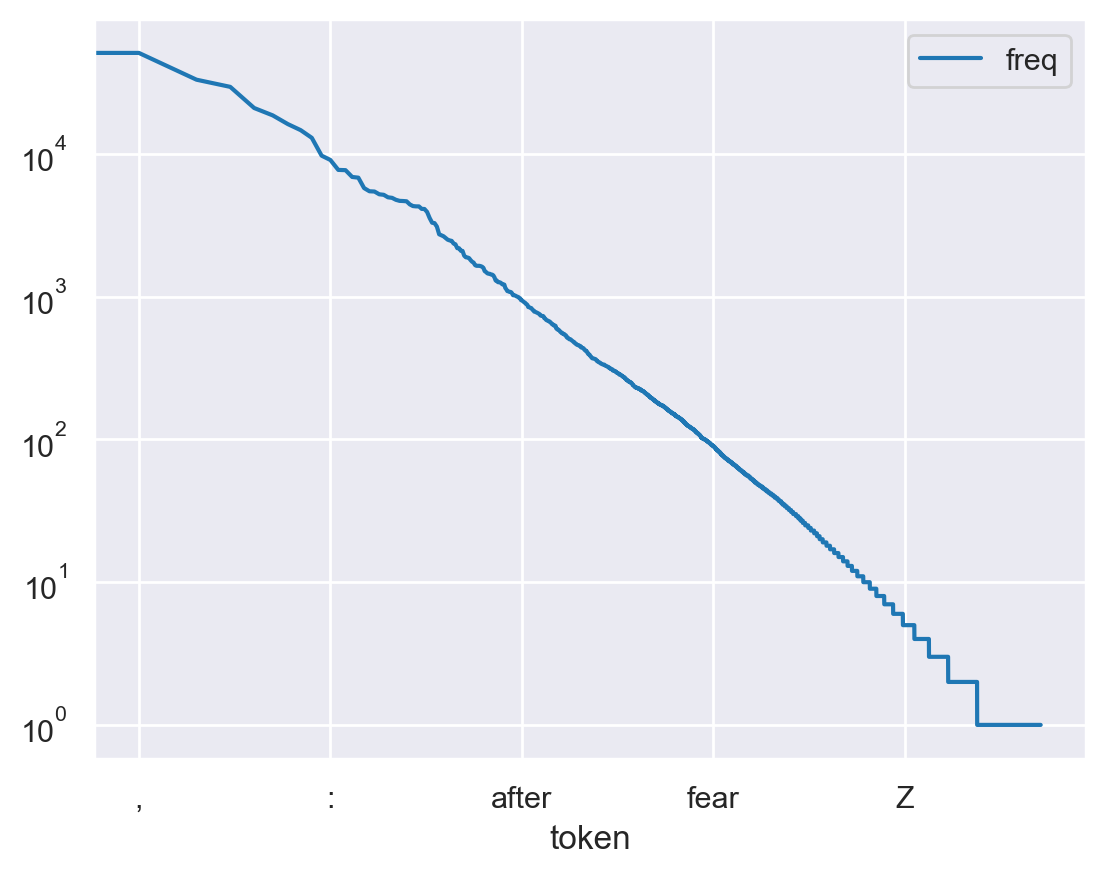

In [55]:
myth_tok_freq_df.plot(loglog=True)
plt.show()

### Wow! How straight is that!

- Explain why there are: `,: after fear Z?`

#### 🚧 TODO: Now let's process the token freq for every corpus

In [56]:
all_token_freqs_df = pd.concat(
    [
        pd.DataFrame.from_dict(
            Counter(df.tokens[col]), orient="index", columns=[col]
        )[col]
        .sort_values(ascending=False)
        .reset_index(drop=True)
        for col in len_freq_df.columns
    ],
    axis="columns",
)
all_token_freqs_df

,mythology,woodworking,robotics,hsm,health,portuguese
0,51133.0,65222.0,63416.0,65313.0,71505,51254.0
1,51118.0,52199.0,50685.0,65062.0,61953,32731.0
2,33184.0,41321.0,47236.0,47998.0,61431,20714.0
3,29559.0,38592.0,33785.0,45924.0,41428,19841.0
4,21018.0,37003.0,27570.0,25870.0,35563,16844.0
...,...,...,...,...,...,...
66002,NaN,NaN,NaN,NaN,1,NaN
66003,NaN,NaN,NaN,NaN,1,NaN
66004,NaN,NaN,NaN,NaN,1,NaN
66005,NaN,NaN,NaN,NaN,1,NaN


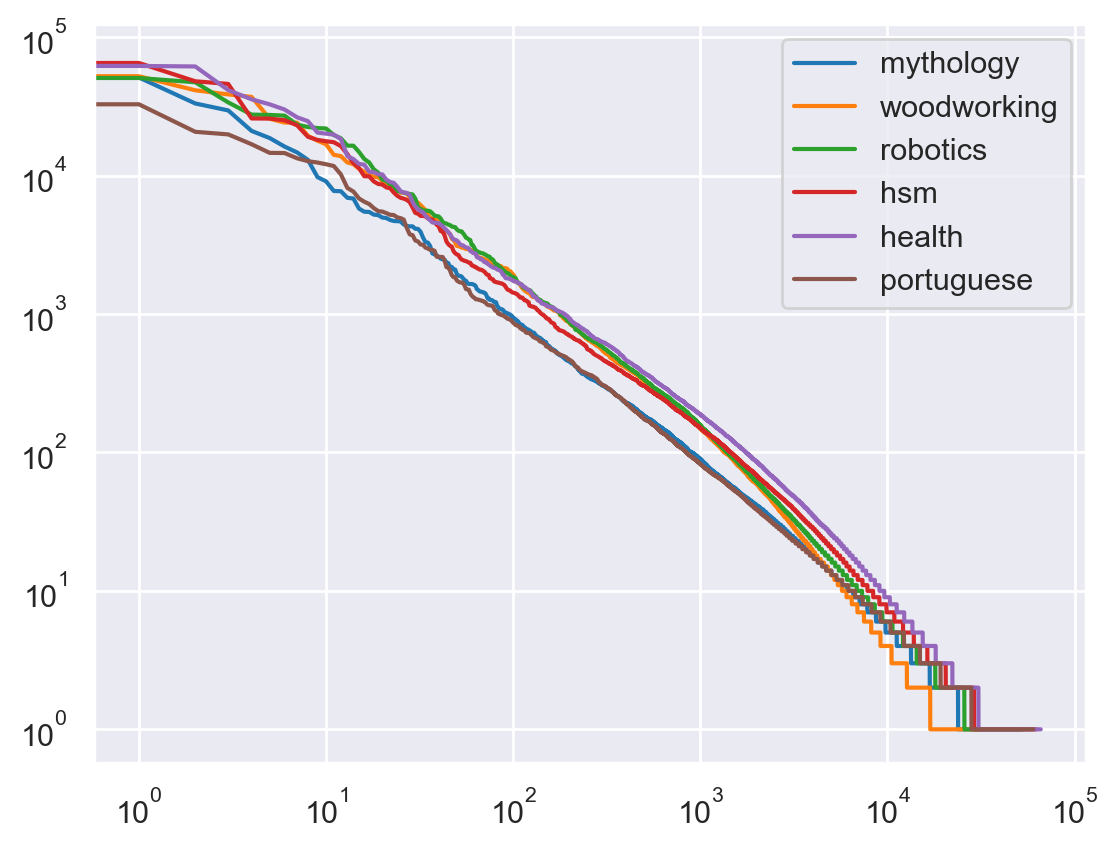

In [57]:
all_token_freqs_df.plot(loglog=True)
plt.show()

#### 🚧 TODO: Do length frequency follow Zipf's law?

Explain the graph results below and possibly fix them

#### What could go wrong?

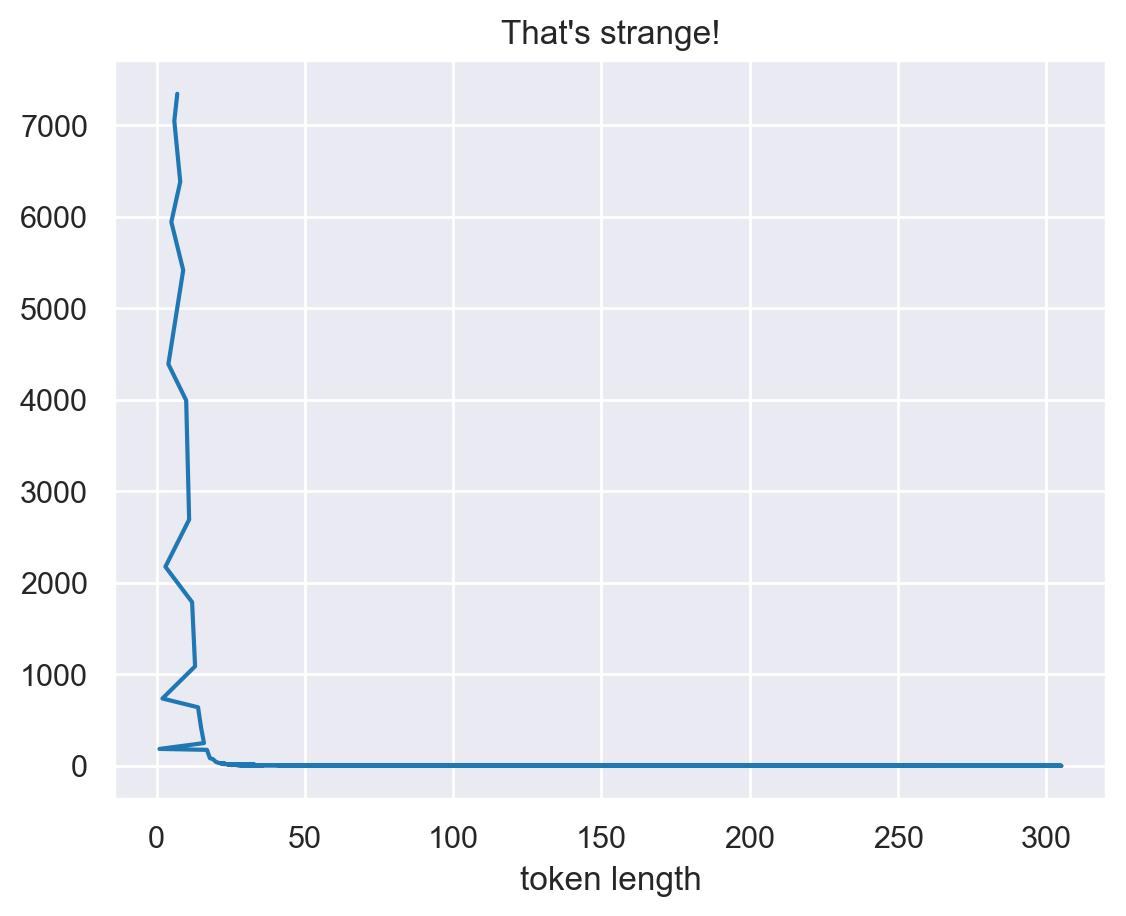

In [58]:
myth_len_freqs.plot(title="That's strange!")
plt.show()

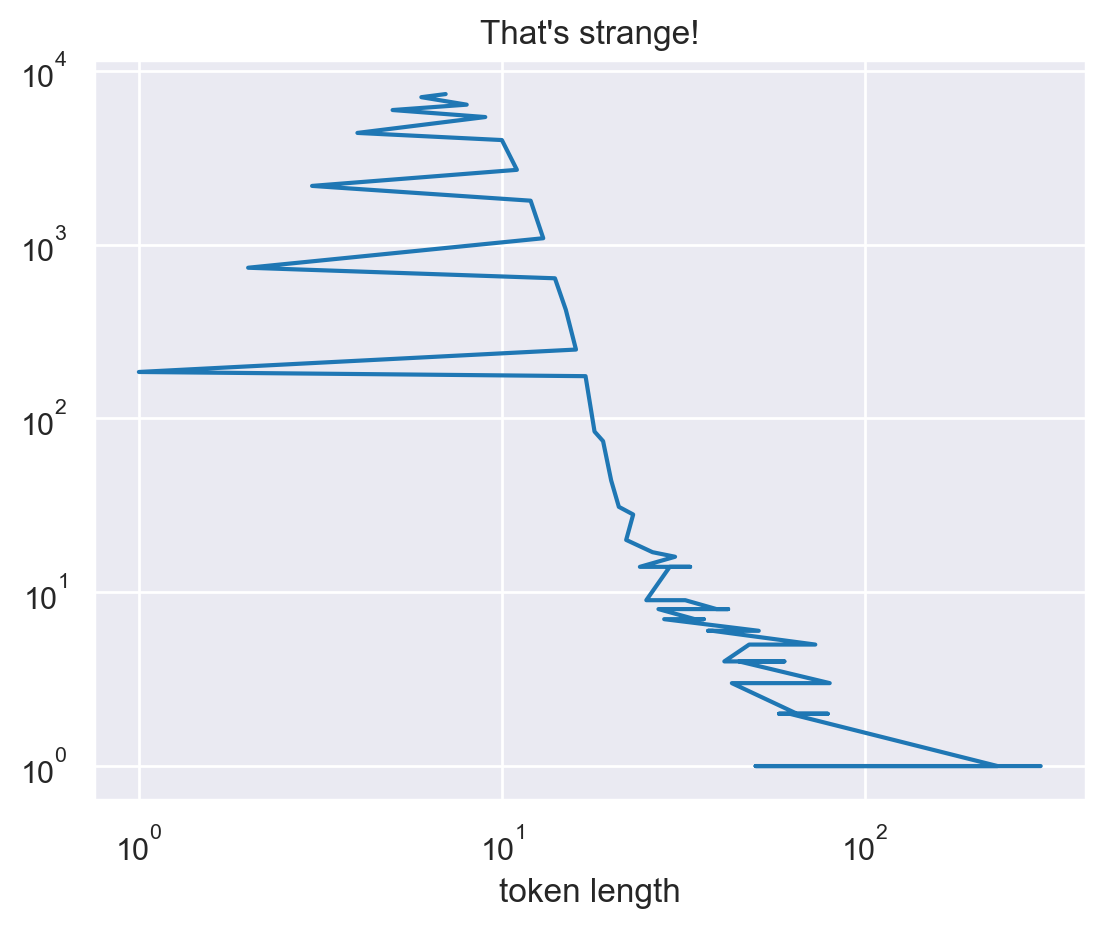

In [59]:
myth_len_freqs.plot(title="That's strange!", loglog=True)
plt.show()

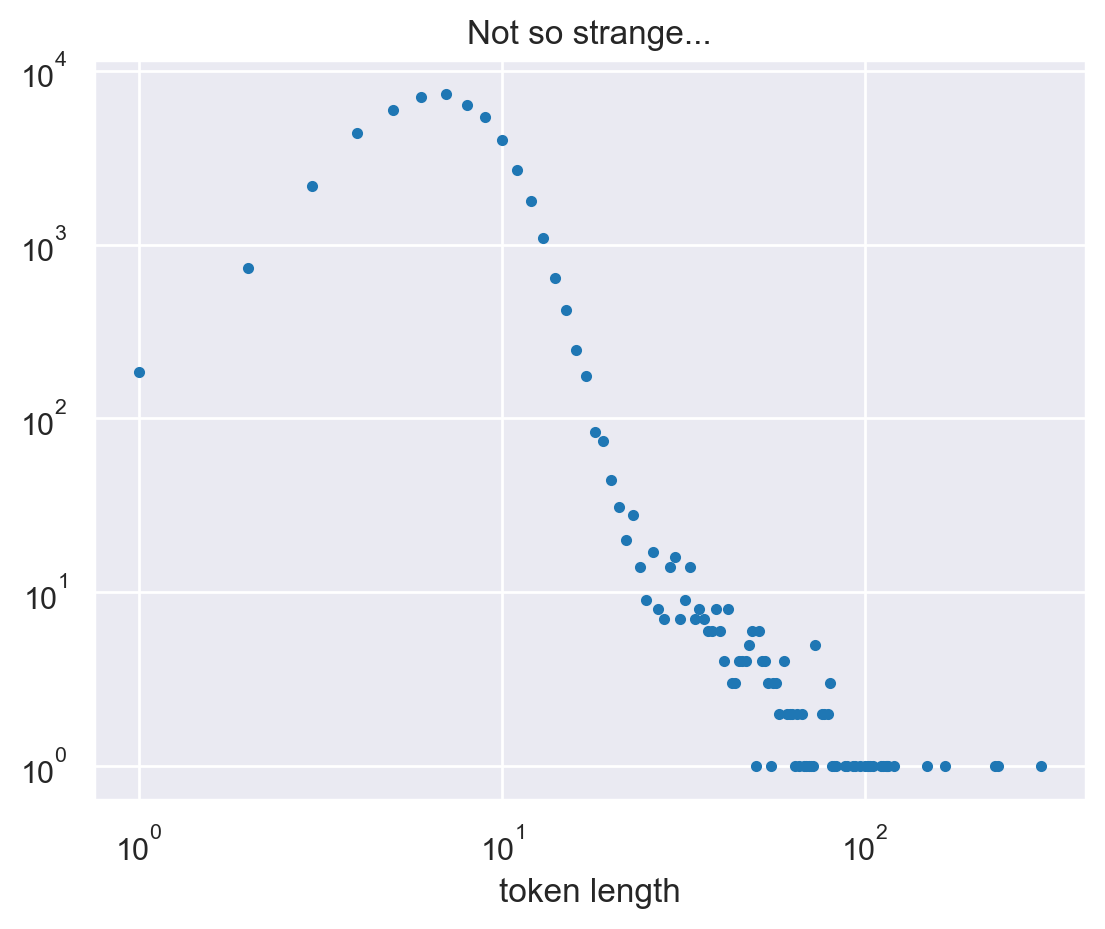

In [60]:
myth_len_freqs.plot(title="Not so strange...", loglog=True, style=".")
plt.show()

* Word lengths do not follow the Zipf's law.

* The graph is not ordered by decreasing length, but by increasing word length.

* To fix this, we need to replace the length (as index) by the order rank value.

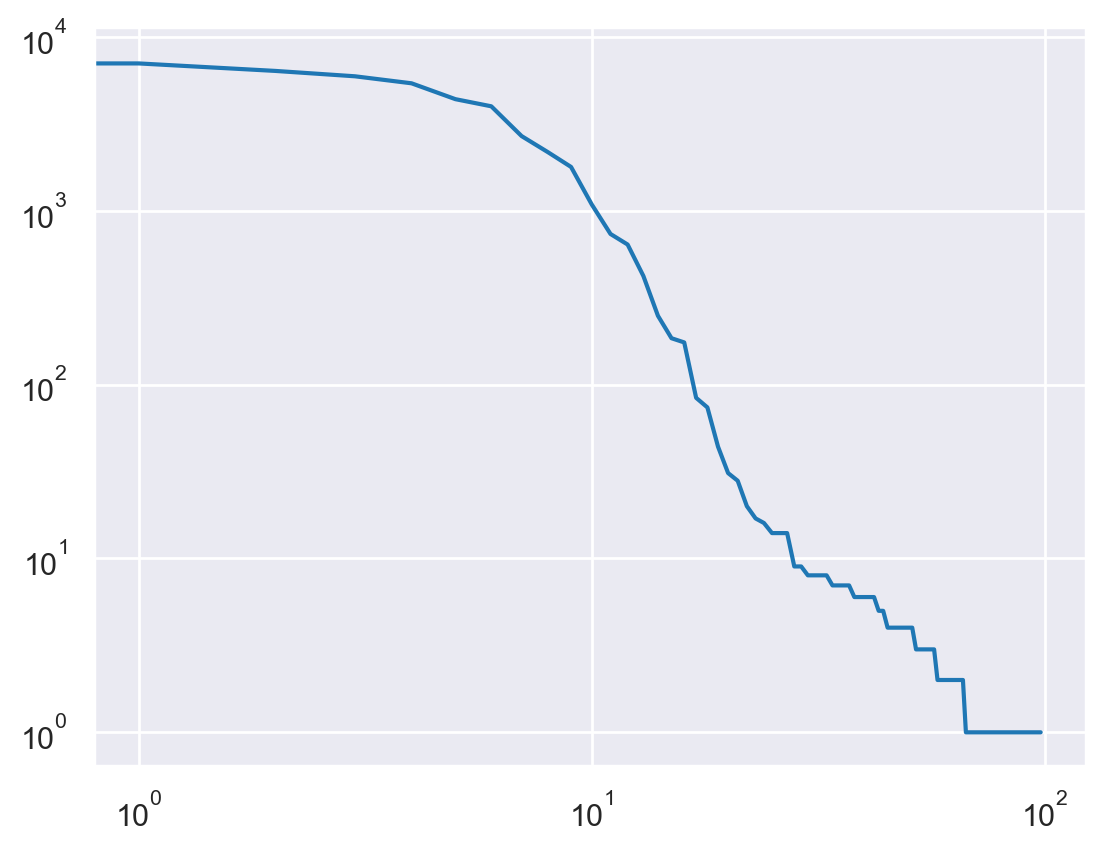

In [61]:
myth_len_freqs.reset_index(drop=True).plot(loglog=True)
plt.show()

#### 🚧 TODO:

#### How to compute richness of words? How to compute the type/token ratio? What corpus will win this time?

#### 🚧 TODO: How to compute richness in words? How to compute the type/token ratio? Who will win this time?

In [62]:
df.head(2)

,files_n,chars_n,text,chars_per_file,char_types_n,char_type_ratio,type_chars_1000,tokens,tokens_n,types_n,avg_wordsize
corpus,,,,,,,,,,,
mythology,1428,4689305,Q:\n\nCan anyone identify what Chinese mytholo...,3283.83,1684,3.59e-04,51,"[Q, :, Can, anyone, identify, what, Chinese, m...",942611,51243,4.97
woodworking,2461,6729416,Q:\n\nGlue-up for butcher block-style countert...,2734.42,159,2.36e-05,49,"[Q, :, Glue-up, for, butcher, block-style, cou...",1390534,32316,4.84


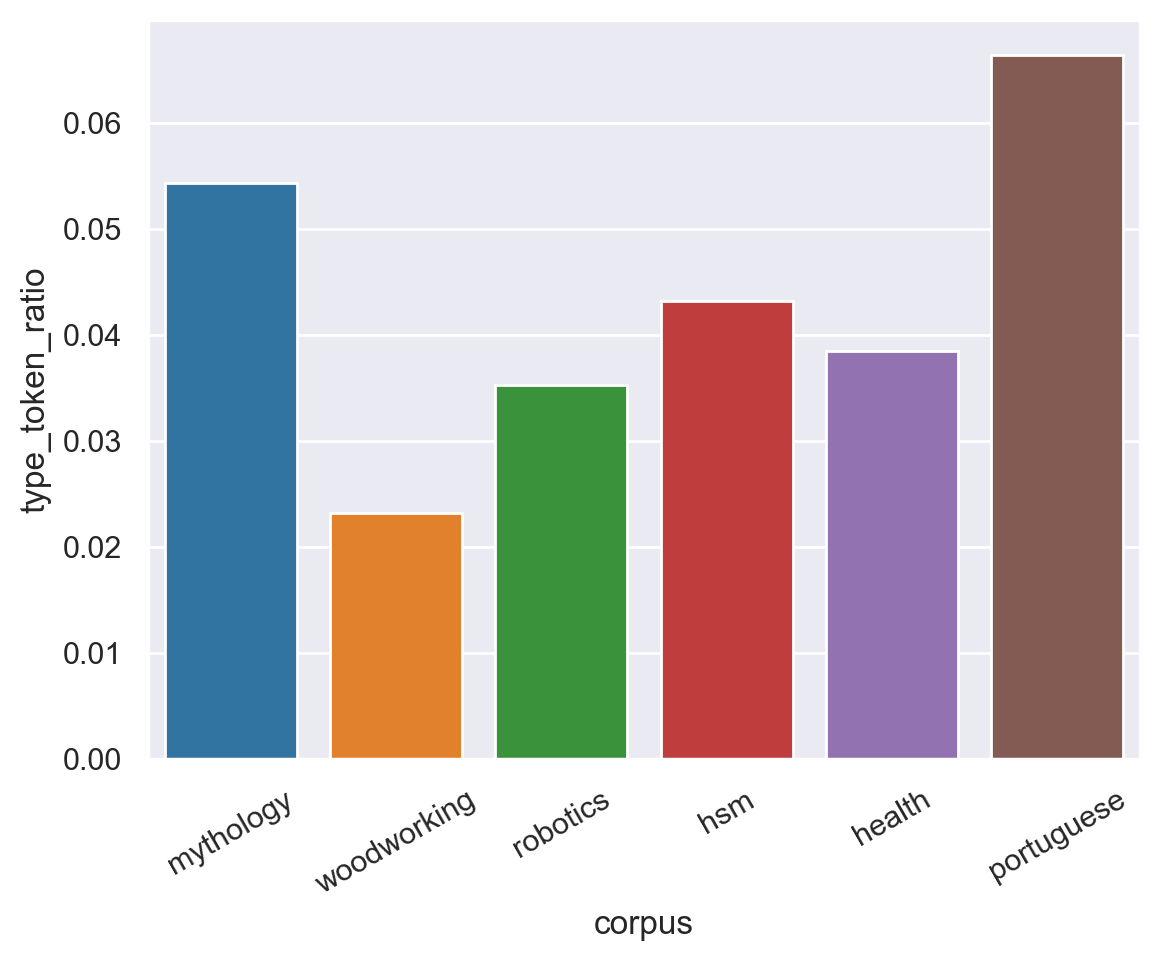

In [63]:
df["type_token_ratio"] = df.types_n / df.tokens_n
sns.barplot(x=df.index, y="type_token_ratio", data=df)
plt.xticks(rotation=30)
plt.show()

### What happened to Portuguese? Explain!

**Answer:**

- Portuguese is an inflectional language! Nouns, adjectives, and, in particular, verbs have many forms.

Make a `type/token` ration growth plot. Explain the obtained order!

In [64]:
word_types = df.tokens.progress_map(
    lambda x: batch_counts(x, max_len=df.tokens_n.min(), hop=10_000)
)

  0%|          | 0/6 [00:00<?, ?it/s]

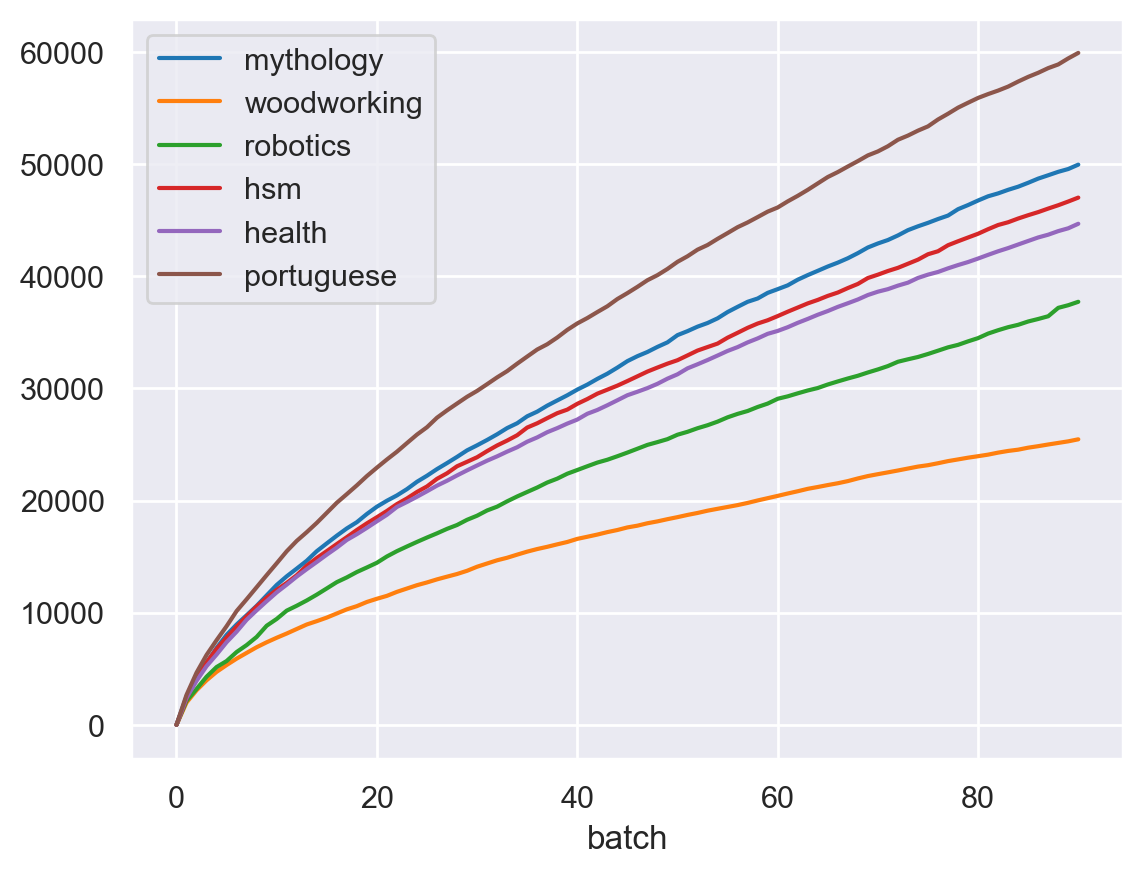

In [65]:
word_type_df = pd.DataFrame(dict(zip(word_types.index, word_types.values)))
word_type_df.index.name = "batch"
word_type_df.plot()
plt.show()

In [66]:
word_type_df

,mythology,woodworking,robotics,hsm,health,portuguese
batch,,,,,,
0,0,0,0,0,0,0
1,2534,1985,2140,2330,2403,2673
2,4169,3085,3200,4259,3923,4654
3,5532,3976,4295,5560,5236,6238
4,6859,4727,5157,6767,6273,7551
...,...,...,...,...,...,...
86,48715,24855,36197,45728,43468,58151
87,49014,25005,36442,46043,43714,58569
88,49320,25145,37190,46341,44032,58895


### Percentage of new words

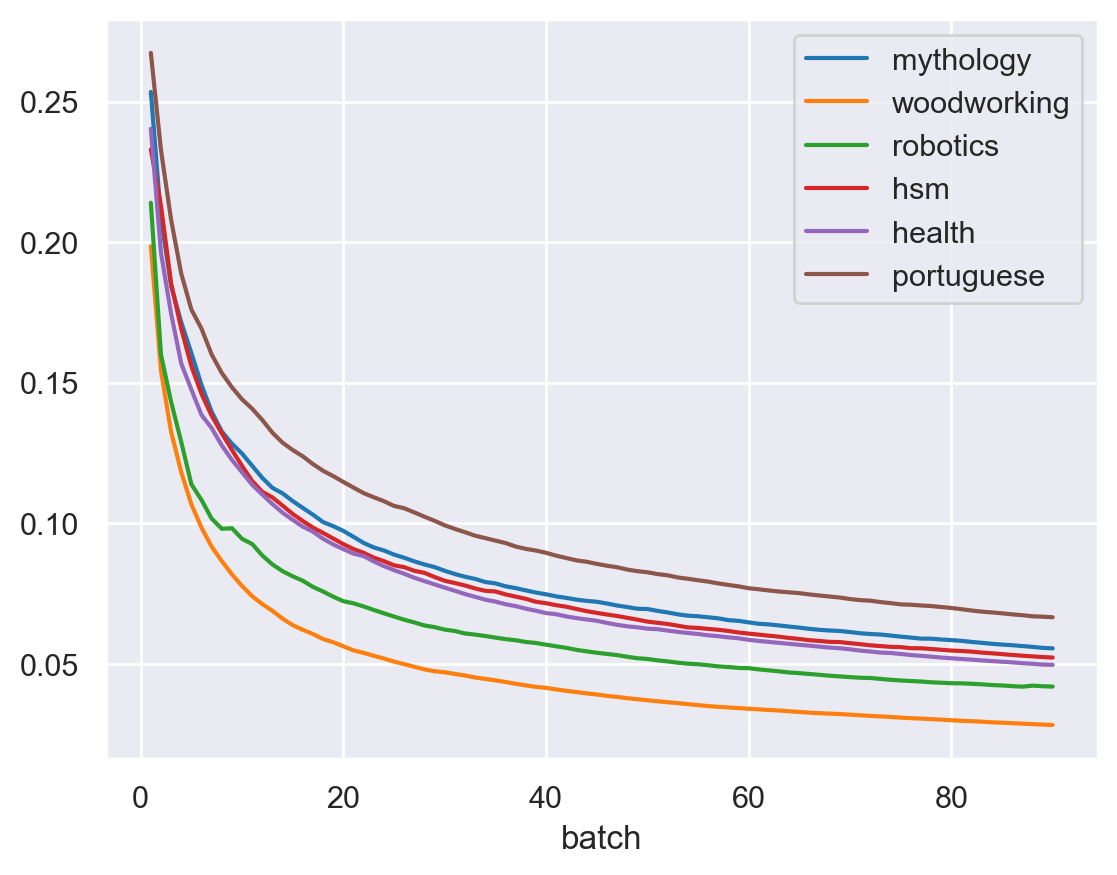

In [67]:
# TODO: Fix the code below (comes from the question nb)

batches = np.arange(0, df.tokens_n.min(), 10_000)
word_type_token_df = word_type_df.divide(batches, axis="index")

word_type_token_df.plot()
plt.show()

In [68]:
word_type_token_df

,mythology,woodworking,robotics,hsm,health,portuguese
batch,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.25,0.20,0.21,0.23,0.24,0.27
2,0.21,0.15,0.16,0.21,0.20,0.23
3,0.18,0.13,0.14,0.19,0.17,0.21
4,0.17,0.12,0.13,0.17,0.16,0.19
...,...,...,...,...,...,...
86,0.06,0.03,0.04,0.05,0.05,0.07
87,0.06,0.03,0.04,0.05,0.05,0.07
88,0.06,0.03,0.04,0.05,0.05,0.07


- Portuguese stays on top!

____